<img src='images/gesis.png' style='height: 50px; float: left'>
<img src='images/social_comquant.png' style='height: 50px; float: left; margin-left: 40px'>

## Introduction to Computational Social Science methods with Python

# Session 5. Network construction and visualization

Network analysis is one of the main classes of methods in Computational Social Science (CSS). Network analysis is based on **relational thinking**, that means, analyses revolve around the relations among units of analysis instead of the attitudes and attributes of the units. The analysis of network structure often uncovers insights that would not have been possible without relatinal thinking, in particular, regarding the existence of regularities in networks and how those are related to behavior (Menczer *et al.* 2020, chapter 0; Lietz *et al.* 2021; McLevey 2022, chapter 13). But analysis is only the last step, it requires that data has been collected and networks have been constructed from it. Often network analysis textbooks are short on these preprocessing steps. Having introduced data collection in sessions 3 and 4, this session is focused on **network construction** (Platt 2019, chapters 2–3).

|<img src='images/transactions.png' style='float: none; width: 480px'>|
|:--|
|<em style='float: center'>**Figure 1**: Four dimensions of transactions as micro events</em>|

In many cases, Digital Behavioral Data (DBD) takes the form of transaction which have the four dimensions shown in ***figure 1*** (Lietz *et al.* 2021). The most obvious dimension to construct networks from are the **social relations**. A social relation consists of two **nodes** that are actors and, thus, capable of actively exhibiting behavior. Typically, these are persons, though groups or organizations also qualify as actors. The link between a pair of nodes is called an **edge**. Networks made of social relations are called **social networks**. Before DBD became available, social relations could be observed or collected in surveys most easily, and social networks had been the focus of research attention for decades (Freeman 2004).

But the four dimensions of transactions offer many more options to construct networks. Think of networks that consist of edges among nodes that are not actors but concepts or symbols (*e.g.*, words used in a sentence or hashtags used in a tweet). Such networks derive from the **communicative content** of transactions and, since they carry the meaning expressed in behavior, are called **cultural networks** or communication networks (Fuhse 2022). Then, think of **socio-cultural networks** that can consist of both kinds of nodes (actors and symbols), actors linked by edges quantifying their behavioral (communicative) similarity, or even symbols linked by some kind of social edge. This is where CSS can make a big contribution (Fuhse 2022, pp. 291–293). Node **attributes** can also be used to create different types of edges (*e.g.*, friendships among persons of the same or different sex). **Time** adds yet another dimension to network construction. DBD often comes in the form of continuous link streams where edges are active at defined points or periods in time. The problem faced by the network analyst is how to handle this potential **richness** of DBD, which information to use, how, and which to throw away.

Fortunately, graph theory, the mathematical corpus that underlies network analysis and theory, provides a set of helpful concepts. First, there can be **node attributes and edge attributes** which allows us, for example, to incorporate numerical information or filter networks.

|<img src='images/copenhagen.jpg' style='float: none; width: 480px'>|
|:--|
|<em style='float: center'>**Figure 2**: Four different types of social relations in the Copenhagen Networks Study interaction data</em>|

Second, there can be **multilayer networks** where each layer consists of a different edge type. The idea of layers is fundamental in sociological theory because the roles of persons in social life are thought to originate from the interdependence of multiple domains like family, work, or friendship circles, and domains can be operationalized as network layers. In digital life, layers can also represent transactions in different platforms (*e.g.*, Twitter, Mastodon) or from different protocols (*e.g.*, phone calls, text messages). ***Figure 2*** depicts the four layers which are available as the Copenhagen Networks Study (CNS) interaction data (Sapiezynski *et al.* 2019). Multilayer network analysis with this dataset has demonstrated that physical social gatherings measured via physical mobile phone proximity are coordinated by phone calls and text messages hours before the gatherings (Sekara *et al.* 2016). Layers can also correspond to temporal network snapshots to study the evolution of a social system (Menczer *et al.* 2020, pp. 26–28).

Third, there can be **multimodal networks** where nodes belong to distinct categories (the modes), and edges are only permitted among nodes belonging to different categories. For two categories, these networks are called 2-mode networks, **bipartite networks**, or affiliation networks (Platt 2019, chapter 4; Ma & Seth 2020, 89–101). The classical example is the network of persons having participated in (being affiliated with) events. The corresponding analyses shed light on the duality or micro-macro relationship of persons and groups, in this example (Breiger 1974). Due to its transactional and rich nature, DBD often has more then two modes. Such data allows for studies of socio-cultural networks but requires non-trivial mathematical data preprocessing (Lee & Martin 2018). Figure 3 in [Session 2: Data handling and visualization]() shows the seven tables used to organize the TweetsCOV19 dataset. Since entities are only linked to entities of other categories, this dataset, in principle, allows for constructing 7-mode networks, though, in practice, one would reduce the number of modes to keep interpretability.

The other focus of this session is **network visualization**. Plotting networks is an important part of network research because it involves the researcher with her or his senses, gives her or him a feeling for the data, and enables her or him to uncover potential patterns or develop hypotheses. Visualization is, thus, a task that accompanies the researcher from data collection to data preprocessing and analysis. Drawing networks can be an art, but it has a very scientific aspect. As information visualization, the goal is to depict various pieces of information in a way that speaks to the reader (Krempel 2014).

There are three full-fledged **libraries for network preprocessing and analysis** in Python. Each comes with advantages and disadvantages. The most popular one is [NetworkX](https://networkx.org/). This library offers a huge set of methods and has a very large user base, that is, it is quite likely that the solution to your problem is already on the question and answering website [Stack Overflow](https://stackoverflow.com/). NetworkX is written in pure Python. This makes it a good library for teaching as the original code can be inspected without knowledge of a language other than Python. It also makes installation much easier, and, hence, NetworkX is included in the Anaconda distribution we are using here. The drawback of a pure Python implementation is that it is not ideal for large-scale computation because this requires base implementation in a language like C.

The other libraries for network preprocessing and analysis are based on C code and are, thus, as fast as it gets in Python. [igraph](https://igraph.org/) is a collection of network tools and can be programmed in Python, R, Mathematica, and C. The [Python interface](https://igraph.readthedocs.io/) is also quite encompassing in terms of the tools it provides. The third library is [graph-tool](https://graph-tool.skewed.de/). This library is known for its extensive stochastic blockmodeling possibilities, it is the best option for visualizing networks (also very large ones), but it requires advanced coding skills and can be tricky to install (particularly on Windows systems). Both igraph and graph-tool are not Anaconda-ready.

<div class='alert alert-block alert-success'>
<b>In this session</b>, 

you will learn how you can construct different types of networks, enrich them with attributes, and draw them such that they are ready for publication, all using the NetworkX library. In subsession **5.1**, we will get to know graphs with undirected or directed and unweighted or weighted edges. We will introduce the Pandas library to organize network data as nodelists and edgelists and see how attributes stored in those tables can be internalized in graph objects. Almost all throughout the whole session, we will be working with the CNS interaction data. In subsession **5.2**, you will learn the essentials of network drawing and relational information vosualization. Subsession **5.3** is dedicated to multilayer networks, using text messages and phone calls as layers. In subsession **5.4**, we approach the dynamic nature of networks and see how different kinds of snapshots can be constructed and combined in a multilayer graph. Subsession **5.5** is about bipartite networks and about how nodes of one mode can be projected into edges among nodes of the other mode. Finally, in subsession **5.6**, you will learn how to make networks simpler by removing certain pieces of information and how you can save graph objects to use them in another notebook or software.
</div>

## 5.1. Graphs and static networks

Static networks are graphs that do not change over time. Graph is the mathematical name for network. A **graph** $G=(V, E)$ is defined by a **set of vertices** (nodes) $V=\{v_1, v_2, ..., v_n\}$ and a **set of edges** $E=\{e_1, e_2, ..., e_m\}$. We will return to this graph theoretic notation in this session and in [Session 7: Network analysis]().

### 5.1.1. Constructing from scratch

An **undirected simple graph** merely consists of these sets $V$ and $E$. It can be constructed from scratch by defining an object of the [`Graph`](https://networkx.org/documentation/stable/reference/classes/graph.html) type and adding nodes one by one (Ma & Seth 2020, pp. 9–20):

In [1]:
import networkx as nx
nx.__version__

'2.8.4'

In [2]:
G = nx.Graph()
G.add_node('James')
G.add_node('Kirk')
G.add_node('Lars')
G.add_node('Robert')
G.nodes()

NodeView(('James', 'Kirk', 'Lars', 'Robert'))

Alternatively, nodes can be added all at once from a list:

In [3]:
G = nx.Graph()
G.add_nodes_from(nodes_for_adding=['James', 'Kirk', 'Lars', 'Robert'])
G.nodes()

NodeView(('James', 'Kirk', 'Lars', 'Robert'))

Note that the nodes are of the string data type, they are not integers. The possibility to do so is a distinguished feature of NetworkX.

Edges (*i.e.*, node pairs) can also be added one by one:

In [4]:
G.add_edge('James', 'Kirk')
G.add_edge('James', 'Lars')
G.add_edge('Kirk', 'Lars')
G.edges()

EdgeView([('James', 'Kirk'), ('James', 'Lars'), ('Kirk', 'Lars')])

Remove the edges...

In [5]:
G.remove_edge('James', 'Kirk')
G.remove_edge('James', 'Lars')
G.remove_edge('Kirk', 'Lars')
G.edges()

EdgeView([])

and add them all at once:

In [6]:
G.add_edges_from(ebunch_to_add=[['James', 'Kirk'], ['James', 'Lars'], ['Kirk', 'Lars']])
G.edges()

EdgeView([('James', 'Kirk'), ('James', 'Lars'), ('Kirk', 'Lars')])

**Directed simple graph**: If the direction of edges matters, you must define a graph object of the [`DiGraph`](https://networkx.org/documentation/stable/reference/classes/digraph.html) class:

In [7]:
D = nx.DiGraph()
#D.add_nodes_from(nodes_for_adding=['James', 'Kirk', 'Lars', 'Robert'])
D.add_edges_from(ebunch_to_add=[['James', 'Kirk'], ['James', 'Lars'], ['Kirk', 'Lars']])
D.nodes()

NodeView(('James', 'Kirk', 'Lars'))

This time the edges point from the first node to the second of the pair. Note that there is no edge involving 'Robert' who, therefore, is not in the node set. Any nodes that do not have an edge must be added explicitly.

Both networks of the Graph and DiGraph class can have self-loops (nodes linked to themselves), for example:

In [8]:
D.add_edge('Robert', 'Robert')
D.edges()

OutEdgeView([('James', 'Kirk'), ('James', 'Lars'), ('Kirk', 'Lars'), ('Robert', 'Robert')])

### 5.1.2. Constructing from Pandas dataframes

Simple graphs only contain information whether or not an edge among a node pair is present. But often we have edge (and node) size attributes, for example, numerical weights of edges such as co-occurrence counts or similarity scores. Graph theoretically, an undirected or directed **weighted graph** $G_W=(V, E, W)$ is a set of vertices and edges with a third set of weights $W=\{w_1, w_2, ..., w_o\}$ attached to the edges. This notation allows for attaching further attributes to either vertices or edges.

In order to keep network data tidy, it is good practice to store vertices from $V$ in a **nodelist** and edges from $E$ in an **edgelist** (McLevey 2022, chapter 13.5). Edge weights $W$ are stored in the edgelist because they are attached to edges. Similarly, all additional node and edge attributes are stored in either the nodelist or the edgelist. Pandas is the right library for this task. Suppose these are your nodelist and edgelist (actually, we should say node and edge dataframes, but "nodelist" and "edgelist" are established terms):

In [9]:
import pandas as pd

In [10]:
nodelist = pd.DataFrame([['James', 500, 'red'], ['Kirk', 300, 'red'], ['Lars', 500, 'green'], ['Robert', 100, 'blue']], columns=['name', 'size', 'color'])
nodelist

,name,size,color
0,James,500,red
1,Kirk,300,red
2,Lars,500,green
3,Robert,100,blue


In [11]:
edgelist = pd.DataFrame([['James', 'Kirk', 1, 'red', 'solid'], ['James', 'Lars', 3, 'green', 'dashed'], ['Kirk', 'Lars', 5, 'blue', 'dashed']], columns=['name_u', 'name_v', 'weight', 'color', 'style'])
edgelist

,name_u,name_v,weight,color,style
0,James,Kirk,1,red,solid
1,James,Lars,3,green,dashed
2,Kirk,Lars,5,blue,dashed


NetworkX offers a straightforward way to construct a graph from a Pandas edgelist. The [`from_pandas_edgelist()`](https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html) wrapper creates a graph of a specifiable class. Here, we create an undirected (line 6) weighted (line 5) graph. Set `data = True` (line 8) to see the attribute values:

In [12]:
G = nx.from_pandas_edgelist(
    df = edgelist, 
    source = 'name_u', 
    target = 'name_v', 
    edge_attr = ['weight'], 
    create_using = nx.Graph
)
G.edges(data=True)

EdgeDataView([('James', 'Kirk', {'weight': 1}), ('James', 'Lars', {'weight': 3}), ('Kirk', 'Lars', {'weight': 5})])

In [13]:
G.nodes()

NodeView(('James', 'Kirk', 'Lars'))

Now that `G` exists we can add the missing nodes to it:

In [14]:
G.add_nodes_from(nodes_for_adding=nodelist['name'])
G.nodes()

NodeView(('James', 'Kirk', 'Lars', 'Robert'))

While `from_pandas_edgelist()` makes it easy to directly store edge attributes in the graph, there is no comparable way to do so for node attributes.

Some users store their network data as a possibly weighted **adjacency matrix**. The matrix corresponding to the `edgelist` looks like this:

In [15]:
matrix = pd.DataFrame([[0, 1, 3, 0], [0, 0, 5, 0], [0, 0, 0, 0], [0, 0, 0, 0]], index=['James', 'Kirk', 'Lars', 'Robert'], columns=['James', 'Kirk', 'Lars', 'Robert'])
matrix

,James,Kirk,Lars,Robert
James,0,1,3,0
Kirk,0,0,5,0
Lars,0,0,0,0
Robert,0,0,0,0


Adjacency matrices can also be added to a graph directly from Pandas:

In [16]:
G = nx.Graph()
G = nx.from_pandas_adjacency(matrix)
G.edges(data=True)

EdgeDataView([('James', 'Kirk', {'weight': 1}), ('James', 'Lars', {'weight': 3}), ('Kirk', 'Lars', {'weight': 5})])

In [17]:
G.nodes()

NodeView(('James', 'Kirk', 'Lars', 'Robert'))

Note two things: First, [`from_pandas_adjacency()`](https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_adjacency.html) directly adds edge weights stored in the cells of the adjacency matrix; second, if nodes without any edges exist in the adjacency matrix, they will be added to the graph.

Whatever way the graph is populated with weighted edges, the weights are now internalized in the graph object. To utilize them for network drawing, they must be transformed into a list:

In [18]:
edge_weight = list(nx.get_edge_attributes(G, 'weight').values())

This list is then called in the [`draw()`](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw.html) function which works closely with the Matplotlib drawing library. `draw()` is a wrapper for the [`draw_networkx()`](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html) function and uses its parameters. Use the same node position for all visualizations of this graph:

In [19]:
node_pos = nx.circular_layout(G=G)

In [20]:
import matplotlib.pyplot as plt

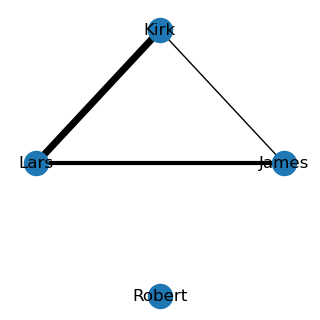

In [21]:
plt.figure(figsize=[3, 3])
nx.draw(G=G, pos=node_pos, with_labels=True, width=edge_weight)

### 5.1.3. Internalizing attributes
While it is nice that edge weights can be stored in the adjacency matrix and easily added to the graph, the matrix format wastes memory because – other than in the edgelist – zeros are also stored. The matrix format can also store only one edge attribute whereas the edgelist can store as many as you want. In fact, node and edge attributes do not have to be internalized in the graph object. Here, we call all of them from the nodelist and edgelist:

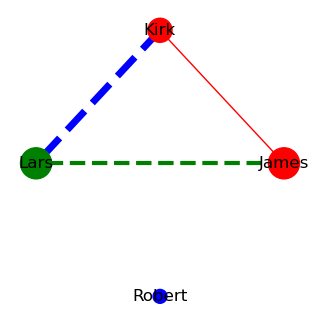

In [22]:
plt.figure(figsize=[3, 3])
nx.draw(
    G = G, 
    pos = node_pos, 
    with_labels = True, 
    node_size = nodelist['size'], 
    node_color = nodelist['color'], 
    width = edgelist['weight'], 
    edge_color = edgelist['color'], 
    style = edgelist['style']
)

Still, it might be a good idea to internalize all attributes – to store all of them in the graph object. For example, you may want to store graph and attributes in a file to transfer a preprocessed graph to another notebook. One way to do so is to use `from_pandas_edgelist()` and add all edge attributes right away by setting `edge_attr = ['weight', 'color', 'style']`. Note that `from_pandas_edgelist()` creates a graph object, so the function cannot be used to add additional edge attributes to an existing graph. You can still add one or many edge attributes after a graph has been populated with edges. Assuming that the edge attributes to be added reside in one or many edgelist columns, this requires some extra steps. The `get_attr_values()` function transforms columns from nodelists or edgelists to then be set as node or edge attributes:

In [23]:
def get_attr_values(df, type_of_list, attr, node='name', source='source', target='target'):
    '''
    Transforms one or multiple columns of a nodelist or edgelist into a dictionary that can be used to set the node or edge attributes of a graph.
    
    Parameters:
        df : Pandas DataFrame
            Nodelist or edgelist that contains the node or edge attributes.
        type_of_list : String, either 'nodes' or 'edges'
            To specify if attribute values should be created for nodes or edges.
        attr : List
            List containing the names of the columns in df that contain the attribute values.
        name : String, only required if df is a 'nodes' type_of_list, default 'name'
            Column name of the nodelist containing the node labels.
        source : String, only required if df is an 'edges' type_of_list, default 'source'
            Column name of the edgelist containing the source node labels.
        target : String, only required if df is an 'edges' type_of_list, default 'target'
            Column name of the edgelist containing the target node labels.
    
    Returns:
        Dictionary with nodes or edges as keys and an attribute dictionary as values.
    '''
    df_ = df.copy()
    df_ = pd.DataFrame([df_[attr].to_dict('records')]).T
    if type_of_list == 'nodes':
        df_.index = df[node]
    if type_of_list == 'edges':
        df_.index = list(zip(df[source], df[target]))
    return list(df_.to_dict().values())[0]

At this point, only the edge 'weight' attribute is internal to `G`. To internalize the 'color' and 'style' attributes, call the `get_attr_values()` function just created...

In [24]:
edge_attr = get_attr_values(df=edgelist, type_of_list='edges', attr=['color', 'style'], source='name_u', target='name_v')
edge_attr

{('James', 'Kirk'): {'color': 'red', 'style': 'solid'},
 ('James', 'Lars'): {'color': 'green', 'style': 'dashed'},
 ('Kirk', 'Lars'): {'color': 'blue', 'style': 'dashed'}}

and use the returned dictionary as `values` in [`set_edge_attributes()`](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.set_edge_attributes.html):

In [25]:
nx.set_edge_attributes(G=G, values=edge_attr)

In [26]:
G.edges(data=True)

EdgeDataView([('James', 'Kirk', {'weight': 1, 'color': 'red', 'style': 'solid'}), ('James', 'Lars', {'weight': 3, 'color': 'green', 'style': 'dashed'}), ('Kirk', 'Lars', {'weight': 5, 'color': 'blue', 'style': 'dashed'})])

The `get_attr_values()` function also works for nodelists, ...

In [27]:
node_attr = get_attr_values(df=nodelist, type_of_list='nodes', attr=['size', 'color'])
node_attr

{'James': {'size': 500, 'color': 'red'},
 'Kirk': {'size': 300, 'color': 'red'},
 'Lars': {'size': 500, 'color': 'green'},
 'Robert': {'size': 100, 'color': 'blue'}}

and the resulting values can be internalized accordingly using [`set_node_attributes()`](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.set_node_attributes.html):

In [28]:
nx.set_node_attributes(G=G, values=node_attr)
G.nodes(data=True)

NodeDataView({'James': {'size': 500, 'color': 'red'}, 'Kirk': {'size': 300, 'color': 'red'}, 'Lars': {'size': 500, 'color': 'green'}, 'Robert': {'size': 100, 'color': 'blue'}})

Finally, we can also add an attribute to the graph itself, usually just a description:

In [29]:
G.graph['name'] = 'Toy example'
G.graph

{'name': 'Toy example'}

To draw the network using the internalized attributes (all but the graph attribute), we must transform them to lists:

In [30]:
node_size = list(nx.get_node_attributes(G=G, name='size').values())
node_color = list(nx.get_node_attributes(G=G, name='color').values())
edge_width = list(nx.get_edge_attributes(G=G, name='weight').values())
edge_color = list(nx.get_edge_attributes(G=G, name='color').values())
edge_style = list(nx.get_edge_attributes(G=G, name='style').values())

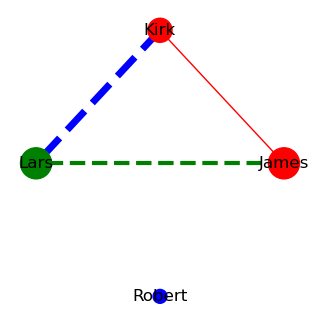

In [31]:
plt.figure(figsize=[3, 3])
nx.draw(
    G = G, 
    pos = node_pos, 
    with_labels = True, 
    node_size = node_size, 
    node_color = node_color, 
    width = edge_width, 
    edge_color = edge_color, 
    style = edge_style
)

Since the `node_pos`ition is not internalized yet, do so:

In [32]:
nx.set_node_attributes(G=G, values=node_pos, name='pos')

Note that the input to the `pos` parameter in the `draw()` function must be (and is) a dictionary, not a list as for most other parameters.

<div class='alert alert-block alert-info'>
<big><b>Insight: Nodes as labels or integers?</b></big>

NetworkX can handle any definition of nodes, whether they are strings, integers, or even both. This makes NetworkX comfortable to use. But you may still want to use integers $\{0, 1, ..., n\}$ to specify your nodes in a more formal way where $n$ is the number of nodes. If you want that, you can use the index of your nodelist as node labels and use those integers in the edgelist. More information is [here](https://networkx.org/documentation/stable/tutorial.html#what-to-use-as-nodes-and-edges).
</div>

### 5.1.4. The Copenhagen Networks Study interaction data

The Copenhagen Networks Study (CNS) interaction dataset, publicly released in 2019, is a multilayer temporal network which connects a population of more than 700 university students over four weeks (Sapiezynski *et al.* 2019). The [story](https://researchdata.springernature.com/posts/57331-the-copenhagen-networks-study) behind the study is best explained by its principal investigator Sune Lehmann:

> All the way back in 2012, my research group embarked on (what was then) a crazy project. Spearheading the data-collection aspect of a consortium of researchers from sociology, anthropology, economics, psychology, physics, and public health, we had purchased 1000 smartphones with the goal of distributing them to all 2013 freshmen at DTU.
> 
> The idea was to use the smartphones as scientific measurement devices to sense the social networks among all the freshmen in unprecedented detail. With their continued consent and support, we measured physical proximity (who met face-to-face) with 5-minute time resolution, phone calls, text messages, and Facebook friendships. Alongside the network data, we also collected other data types: demographics, mobility, personality, etc.
> 
> The technology we used had been pioneered at the MIT MediaLab, but what makes this project special is, first of all, the sheer size. One thousand people was almost an order of magnitude larger than any other scientific study using smartphones to measure social behavior. And to this day, this study remains the largest of its kind. Secondly, we had chosen the freshmen because they form a densely connected population with lots of social interactions. 
> 
> We are beyond excited to finally be able to share the network component of this data set freely with the scientific community. With our publication in Scientific Data, we’re releasing a month of network data, which we hope will enable exciting new modeling and simulation of multi-layer temporal networks.

Even though all sociodemographic attributes but the binary sex of students could not be publicly released to protect student identities, the dataset is still one of the richest available. We have already downloded the data from [here](https://figshare.com/articles/dataset/The_Copenhagen_Networks_Study_interaction_data/7267433) and stored it in the '../data/CNS' directory.

<div class='alert alert-block alert-warning'>
<b>Additional resources</b>

Run the [Copenhagen_Networks_Study_Notebook](../data/cns/Copenhagen_Networks_Study_Notebook.ipynb) to learn how the data providers load the data and do some visualizations. To adapt the code to the newer NetworkX version we are using here, change line 20 in the `VisualizeBluetoothNetwork()` function from `connected_components = list(nx.connected_component_subgraphs(G))` to `connected_components = [G.subgraph(c) for c in nx.connected_components(G)]`.
</div>

<div class='alert alert-block alert-danger'>
<b>Caution</b>

An important check in constructing a network from a nodelist and an edgelist is to make sure that the node labels or identifiers in both tables match. The CNS dataset contains a 'genders.csv' file with a user label and a binary sex attribute. However, some students (users) for which social relations have been collected did not provide their sex or did not participate in the survey at all. Since these students are not listed in the 'genders.csv' file, a nodelist created from this file would not match the edgelists.
</div>

Therefore, we provide a complete nodelist in the following cell. We have built it by merging the students in the 'genders.csv' file with all those that occurr in any of the four edgelists. The sex categories are 0: male; 1: female; 2: unknown.

In [33]:
nodelist_cns = pd.DataFrame(data=[[0, 0], [1, 2], [2, 0], [3, 0], [4, 0], [5, 0], [6, 1], [7, 1], [8, 0], [9, 0], [10, 0], [11, 0], [12, 0], [13, 0], [14, 0], [15, 0], [16, 0], [17, 0], [18, 0], [19, 0], [20, 0], [21, 1], [22, 0], [23, 0], [24, 0], [25, 0], [26, 2], [27, 0], [28, 0], [29, 0], [30, 0], [31, 2], [32, 1], [33, 0], [34, 0], [35, 0], [36, 1], [37, 0], [38, 0], [39, 0], [40, 0], [41, 1], [42, 0], [43, 0], [44, 0], [45, 0], [46, 1], [47, 0], [48, 1], [49, 0], [50, 0], [51, 1], [52, 0], [53, 1], [54, 1], [55, 0], [56, 2], [57, 0], [58, 0], [59, 0], [60, 2], [61, 1], [62, 0], [63, 0], [64, 0], [65, 0], [66, 1], [67, 0], [68, 1], [69, 0], [70, 0], [71, 0], [72, 0], [73, 0], [74, 1], [75, 1], [76, 0], [77, 0], [78, 0], [79, 0], [80, 0], [81, 0], [82, 0], [83, 0], [84, 0], [85, 0], [86, 0], [87, 0], [88, 0], [89, 0], [90, 1], [91, 0], [92, 0], [93, 1], [94, 0], [95, 0], [96, 1], [97, 0], [98, 0], [99, 0], [100, 1], [101, 0], [102, 0], [103, 0], [104, 1], [105, 0], [106, 0], [107, 1], [108, 0], [109, 2], [110, 1], [111, 0], [112, 1], [113, 1], [114, 0], [115, 0], [116, 0], [117, 0], [118, 0], [119, 0], [120, 0], [121, 0], [122, 0], [123, 1], [124, 0], [125, 0], [126, 0], [127, 0], [128, 0], [129, 0], [130, 0], [131, 1], [132, 1], [133, 0], [134, 2], [135, 1], [136, 0], [137, 1], [138, 0], [139, 0], [140, 0], [141, 0], [142, 0], [143, 2], [144, 0], [145, 0], [146, 1], [147, 0], [148, 0], [149, 0], [150, 0], [151, 1], [152, 0], [153, 0], [154, 1], [155, 0], [156, 0], [157, 1], [158, 1], [159, 2], [160, 0], [161, 0], [162, 1], [163, 0], [164, 1], [165, 1], [166, 2], [167, 0], [168, 0], [169, 0], [170, 0], [171, 0], [172, 0], [173, 0], [174, 1], [175, 2], [176, 1], [177, 1], [178, 0], [179, 0], [180, 0], [181, 0], [182, 0], [183, 1], [184, 0], [185, 0], [186, 0], [187, 1], [188, 0], [189, 1], [190, 0], [191, 0], [192, 0], [193, 0], [194, 0], [195, 1], [196, 1], [197, 1], [198, 0], [199, 0], [200, 0], [201, 0], [202, 2], [203, 0], [204, 0], [205, 0], [206, 0], [207, 0], [208, 0], [209, 0], [210, 0], [211, 1], [212, 0], [213, 0], [214, 0], [215, 0], [216, 0], [217, 1], [218, 1], [219, 0], [220, 0], [221, 0], [222, 0], [223, 0], [224, 0], [225, 1], [226, 0], [227, 0], [228, 0], [229, 0], [230, 0], [231, 0], [232, 0], [233, 0], [234, 0], [235, 1], [236, 0], [237, 0], [238, 0], [239, 1], [240, 0], [241, 0], [242, 0], [243, 0], [244, 0], [245, 2], [246, 0], [247, 1], [248, 0], [249, 0], [250, 0], [251, 0], [252, 0], [253, 0], [254, 0], [255, 2], [256, 0], [257, 2], [258, 0], [259, 0], [260, 1], [261, 0], [262, 1], [263, 1], [264, 0], [265, 1], [266, 0], [267, 0], [268, 0], [269, 0], [270, 2], [271, 0], [272, 0], [273, 0], [274, 1], [275, 1], [276, 0], [277, 1], [278, 0], [279, 0], [280, 0], [281, 1], [282, 0], [283, 0], [284, 1], [285, 0], [286, 0], [287, 0], [288, 0], [289, 0], [290, 0], [291, 1], [292, 0], [293, 1], [294, 0], [295, 0], [296, 1], [297, 0], [298, 1], [299, 0], [300, 1], [301, 0], [302, 0], [303, 0], [304, 0], [305, 2], [306, 0], [307, 0], [308, 1], [309, 0], [310, 0], [311, 1], [312, 2], [313, 0], [314, 0], [315, 0], [316, 0], [317, 0], [318, 0], [319, 0], [320, 1], [321, 1], [322, 2], [323, 0], [324, 0], [325, 0], [326, 1], [327, 0], [328, 0], [329, 0], [330, 1], [331, 2], [332, 0], [333, 0], [334, 0], [335, 1], [336, 0], [337, 0], [338, 1], [339, 0], [340, 0], [341, 0], [342, 1], [343, 0], [344, 0], [345, 0], [346, 0], [347, 0], [348, 0], [349, 0], [350, 0], [351, 0], [352, 0], [353, 0], [354, 1], [355, 1], [356, 0], [357, 1], [358, 1], [359, 0], [360, 0], [361, 0], [362, 0], [363, 0], [364, 0], [365, 1], [366, 0], [367, 0], [368, 1], [369, 0], [370, 0], [371, 1], [372, 0], [373, 0], [374, 0], [375, 0], [376, 0], [377, 2], [378, 0], [379, 0], [380, 0], [381, 0], [382, 0], [383, 1], [384, 0], [385, 0], [386, 0], [387, 0], [388, 0], [389, 0], [390, 0], [391, 0], [392, 0], [393, 0], [394, 1], [395, 1], [396, 0], [397, 0], [398, 0], [399, 0], [400, 0], [401, 0], [402, 0], [403, 0], [404, 1], [405, 1], [406, 0], [407, 0], [408, 0], [409, 0], [410, 0], [411, 0], [412, 0], [413, 0], [414, 1], [415, 1], [416, 1], [417, 0], [418, 0], [419, 0], [420, 0], [421, 0], [422, 0], [423, 0], [424, 0], [425, 0], [426, 0], [427, 0], [428, 0], [429, 0], [430, 0], [431, 0], [432, 0], [433, 0], [434, 0], [435, 0], [436, 0], [437, 0], [438, 0], [439, 1], [440, 0], [441, 0], [442, 0], [443, 1], [444, 0], [445, 0], [446, 0], [447, 0], [448, 0], [449, 0], [450, 0], [451, 0], [452, 2], [453, 0], [454, 2], [455, 0], [456, 0], [457, 0], [458, 2], [459, 0], [460, 0], [461, 0], [462, 0], [463, 0], [464, 1], [465, 0], [466, 0], [467, 0], [468, 0], [469, 1], [470, 1], [471, 1], [472, 0], [473, 0], [474, 0], [475, 0], [476, 1], [477, 1], [478, 0], [479, 0], [480, 0], [481, 1], [482, 0], [483, 0], [484, 1], [485, 0], [486, 1], [487, 0], [488, 0], [489, 0], [490, 0], [491, 0], [492, 0], [493, 0], [494, 0], [495, 0], [496, 0], [497, 1], [498, 0], [499, 1], [500, 0], [501, 0], [502, 0], [503, 0], [504, 0], [505, 0], [506, 0], [507, 1], [508, 0], [509, 0], [510, 0], [511, 0], [512, 1], [513, 0], [514, 0], [515, 0], [516, 0], [517, 0], [518, 0], [519, 0], [520, 0], [521, 1], [522, 0], [523, 0], [524, 1], [525, 1], [526, 0], [527, 0], [528, 1], [529, 1], [530, 0], [531, 0], [532, 0], [533, 0], [534, 0], [535, 0], [536, 0], [537, 0], [538, 0], [539, 0], [540, 0], [541, 0], [542, 2], [543, 0], [544, 0], [545, 1], [546, 1], [547, 0], [548, 0], [549, 0], [550, 1], [551, 0], [552, 0], [553, 0], [554, 0], [555, 1], [556, 1], [557, 1], [558, 1], [559, 0], [560, 0], [561, 0], [562, 1], [563, 0], [564, 0], [565, 0], [566, 2], [567, 0], [568, 0], [569, 1], [570, 0], [571, 1], [572, 0], [573, 0], [574, 0], [575, 0], [576, 0], [577, 2], [578, 0], [579, 0], [580, 0], [581, 0], [582, 0], [583, 0], [584, 0], [585, 0], [586, 0], [587, 0], [588, 1], [589, 1], [590, 0], [591, 0], [592, 0], [593, 0], [594, 0], [595, 0], [596, 0], [597, 0], [598, 0], [599, 0], [600, 1], [601, 0], [602, 0], [603, 0], [604, 2], [605, 2], [606, 2], [607, 0], [608, 0], [609, 2], [610, 0], [611, 1], [612, 0], [613, 0], [614, 1], [615, 1], [616, 0], [617, 1], [618, 2], [619, 0], [620, 0], [621, 0], [622, 1], [623, 0], [624, 0], [625, 1], [626, 0], [627, 0], [628, 0], [629, 0], [630, 0], [631, 0], [632, 0], [633, 1], [634, 1], [635, 0], [636, 0], [637, 0], [638, 0], [639, 0], [640, 0], [641, 0], [642, 0], [643, 0], [644, 0], [645, 1], [646, 0], [647, 0], [648, 0], [649, 0], [650, 0], [651, 1], [652, 1], [653, 0], [654, 0], [655, 0], [656, 0], [657, 0], [658, 0], [659, 0], [660, 0], [661, 0], [662, 0], [663, 0], [664, 0], [665, 0], [666, 1], [667, 0], [668, 0], [669, 0], [670, 0], [671, 0], [672, 0], [673, 0], [674, 0], [675, 2], [676, 0], [677, 1], [678, 0], [679, 0], [680, 0], [681, 0], [682, 1], [683, 0], [684, 1], [685, 0], [686, 0], [687, 0], [688, 2], [689, 0], [690, 0], [691, 0], [692, 0], [693, 0], [694, 0], [695, 0], [696, 0], [697, 0], [698, 0], [699, 0], [700, 1], [701, 1], [702, 0], [703, 0], [704, 0], [705, 1], [706, 0], [707, 1], [709, 1], [710, 0], [711, 0], [712, 1], [713, 2], [714, 0], [715, 0], [716, 0], [717, 0], [718, 0], [719, 0], [720, 1], [721, 0], [722, 1], [723, 0], [724, 0], [725, 0], [726, 0], [727, 0], [728, 0], [729, 0], [730, 1], [732, 2], [733, 0], [734, 0], [735, 1], [736, 0], [737, 0], [738, 0], [739, 0], [740, 0], [741, 0], [742, 0], [743, 1], [744, 0], [745, 0], [746, 2], [747, 2], [748, 2], [749, 2], [750, 0], [751, 0], [752, 1], [753, 0], [754, 0], [755, 2], [756, 0], [757, 0], [758, 0], [759, 0], [760, 0], [761, 0], [762, 0], [763, 0], [764, 0], [765, 1], [766, 1], [767, 0], [768, 1], [769, 1], [770, 1], [771, 0], [772, 1], [773, 2], [774, 0], [775, 0], [776, 1], [777, 1], [778, 2], [780, 1], [781, 0], [782, 0], [783, 0], [784, 0], [785, 0], [786, 0], [788, 2], [789, 2], [790, 1], [791, 1], [792, 0], [793, 0], [794, 2], [795, 0], [796, 2], [797, 2], [798, 0], [799, 0], [800, 0], [801, 0], [802, 0], [803, 1], [804, 0], [805, 0], [806, 2], [807, 0], [808, 0], [809, 1], [810, 0], [811, 2], [812, 1], [813, 0], [814, 0], [815, 0], [816, 0], [817, 0], [818, 0], [819, 1], [820, 1], [822, 0], [823, 0], [824, 0], [825, 0], [826, 1], [827, 0], [828, 0], [829, 2], [830, 0], [831, 0], [832, 1], [833, 0], [834, 0], [835, 0], [836, 2], [837, 2], [838, 0], [839, 1], [840, 0], [841, 1], [842, 2], [843, 2], [844, 2], [845, 0], [846, 0], [847, 1], [848, 2], [850, 2]], columns=['user', 'sex'])
nodelist_cns

,user,sex
0,0,0
1,1,2
2,2,0
3,3,0
4,4,0
...,...,...
840,845,0
841,846,0
842,847,1
843,848,2


#### Facebook friendships

The 'user' column of `nodelist_cns` holds the labels used in all four edgelists, and we will use these in the standard NetworkX way (labels instead of integers). Each of the four edgelists is accompanied by a README file. We start with the friendship network:

In [34]:
edgelist_cns_fb = pd.read_csv('../data/CNS/fb_friends.csv')
edgelist_cns_fb.head()

,# user_a,user_b
0,0,512
1,0,263
2,0,525
3,0,285
4,0,543


In [35]:
with open('../data/CNS/fb_friends.README', 'r') as f:
    print(f.read())

column names:
	- user A
	- user B

Edge lists of all declared facebook friendships which were formed before the end of the observation and not dissolved until after the end of the observation.



Friendship relations are undirected and unweighted. For some reason, the edgelist contains self-loops (*i.e.*, some students are friends with themselves). Remove those loops:

In [36]:
edgelist_cns_fb = edgelist_cns_fb[edgelist_cns_fb['# user_a'] != edgelist_cns_fb['user_b']].reset_index(drop=True)

## 5.2. Drawing networks

We have stated in the introduction that network visualization should accompany the researcher in all stages of the research data lifecyle and that, as information visualization, the goal is to communicate the richness of information that may be available. To visualize information, we can rely on a **visual alphabet of networks** that consists of sizes, shapes, and colors, each of which can be applied to nodes and edges. These pieces of information can help in identifying patterns that may exist in the data (Krempel 2014).

In the CNS Facebook friendship case, all we have is the 'sex' node attribute. We decide to use it as a node color. However, we can also use this attribute to color edges. Let us define that an edge should be attributed 0 if both nodes are male, 1 if both nodes are female, and 2 otherwise. Since we construct graphs from a Pandas edgelist, we must create the edge attribute before we can add the node attribute to the graph. To create the desired edgelist, construct a dictionary with node labels as keys and their sex as values (line 1), use this dictionary to set the new 'sex' edge attribute to the node attribute of user A if both users have the same attribute (line 2), set all other edge attributes to 2. (line 3), and transform the data type to integer (line 4):

In [37]:
node_sex_dict = nodelist_cns.set_index('user').to_dict()['sex']
edgelist_cns_fb.loc[edgelist_cns_fb['# user_a'].map(node_sex_dict) == edgelist_cns_fb['user_b'].map(node_sex_dict), 'sex'] = edgelist_cns_fb['# user_a'].map(node_sex_dict)
edgelist_cns_fb['sex'] = edgelist_cns_fb['sex'].fillna(2.)
edgelist_cns_fb['sex'] = edgelist_cns_fb['sex'].astype('int')
edgelist_cns_fb.head()

,# user_a,user_b,sex
0,0,512,2
1,0,263,2
2,0,525,2
3,0,285,0
4,0,543,0


Populate an undirected simple graph `from_pandas_edgelist()` including the just-created 'sex' edge attribute (lines 1–7), potentially adding the missing nodes by adding the full nodelist (line 8):

In [38]:
G_cns_fb = nx.from_pandas_edgelist(
    df = edgelist_cns_fb, 
    source = '# user_a', 
    target = 'user_b', 
    edge_attr = ['sex'], 
    create_using = nx.Graph
)
G_cns_fb.add_nodes_from(nodelist_cns['user'])

Now internalize the node attribute in `G_cns_fb`:

In [39]:
node_attr_sex = get_attr_values(df=nodelist_cns, type_of_list='nodes', attr=['sex'], node='user')
nx.set_node_attributes(G=G_cns_fb, values=node_attr_sex)

The attributes are now ready. However, the detection of any pattern (any non-trivial regularity) surely depends on how the nodes and edges have been placed in the first place. This brings us to graph layouting (Krempel 2014). When drawing a graph, we have to chose a **layout algorithm** from a series of options. Let us start with the Fruchterman-Reingold algorithm which NetworkX uses by default and which is based on **spring embedding**. The documentation of the [`spring_layout()`](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html) function describes it as follows:

> The algorithm simulates a force-directed representation of the network treating edges as springs holding nodes close, while treating nodes as repelling objects, sometimes called an anti-gravity force. Simulation continues until the positions are close to an equilibrium.

The result of such an algorithm is the placing of nodes in a usually 2-dimensional space where axes have no interpretable meaning. We will now use some layout parameters. First, we offer a parameter setting for the Fruchterman-Reingold algorithm. Parameter `k` can be changed to influence the distance between nodes. We propose to set it to 20 times the default value (line 3). The number of `iterations` can be tuned when layouts have not converged yet to an equilibrium which can be the case when graphs are large. We set it to five times the default value (line 4). But experiment with parameter settings yourself:

In [40]:
pos_cns_fb_spring = nx.spring_layout(
    G = G_cns_fb, 
    k = 20 * G_cns_fb.number_of_nodes()**(-1/2), 
    iterations = 5 * 50
)
nx.set_node_attributes(G=G_cns_fb, values=pos_cns_fb_spring, name='pos')

NetworkX uses a set of default colors, but we can also set our own so-called [colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html). the `brg` map of three colors with two color transitions is a good choice for the attribute with three values:

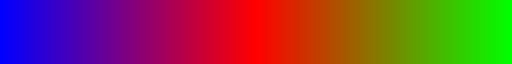

In [41]:
plt.cm.brg

Reduce the `node_size`, add a node border with a `linewidth` of 0.5, and color this node border (`edgecolors`) black (parameters are described [here](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html)):

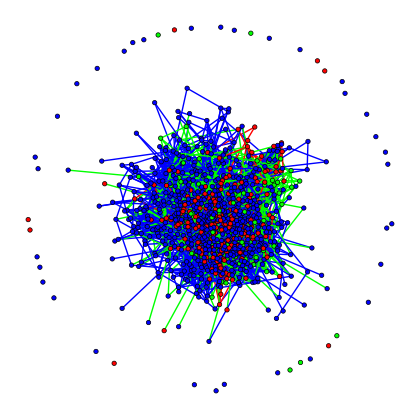

In [42]:
plt.figure(figsize=[4, 4])
nx.draw(
    G = G_cns_fb, 
    pos = nx.get_node_attributes(G=G_cns_fb, name='pos'), 
    node_size = 10, 
    node_color = list(nx.get_node_attributes(G=G_cns_fb, name='sex').values()), 
    cmap = plt.cm.brg, 
    linewidths = .5, 
    edgecolors = 'black', 
    edge_color = list(nx.get_edge_attributes(G=G_cns_fb, name='sex').values()), 
    edge_cmap = plt.cm.brg
)

This network plot is a classical **hairball**: a plot that looks like a plate of spaghetti and does not reveal a pattern. There are two explanations for hairballs. Either there is no pattern to uncover, or the layout has not uncovered it. To check if there is a pattern, we can use a trick to look through the fog of the many edges that overcrowd the drawing. The trick is to just draw the edges using [`draw_networkx_edges()`](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edges.html) and make them transparent (`alpha = .25`):

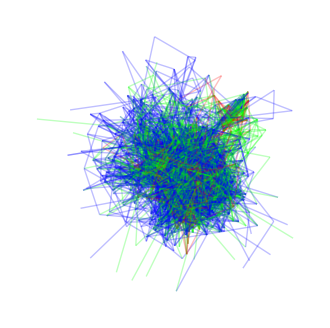

In [43]:
plt.figure(figsize=[4, 4])
nx.draw_networkx_edges(
    G = G_cns_fb, 
    pos = nx.get_node_attributes(G=G_cns_fb, name='pos'), 
    edge_color = list(nx.get_edge_attributes(G=G_cns_fb, name='sex').values()), 
    alpha = .25, 
    edge_cmap = plt.cm.brg
)
plt.box(False)

Besides a very small group of students that did not report their sex (green), the plot still looks rather point-symmetric. Next, try a radial 'twopi' layout from the [Graphviz](https://graphviz.org/) graph visualization software. If no center or `root` node is specified (as in our case), the algorith will automatically pick the most central node. Several different Graphviz [algorithms](https://graphviz.org/docs/layouts/) can be called via the [`graphviz_layout()`](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pydot.graphviz_layout.html) function:

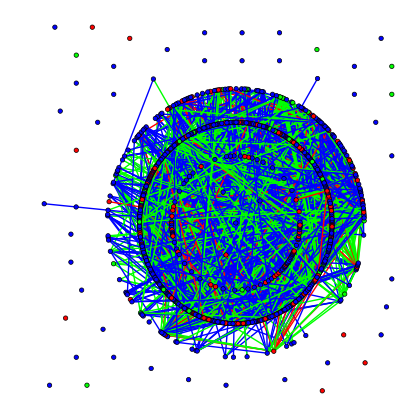

In [44]:
plt.figure(figsize=[4, 4])
nx.draw(
    G = G_cns_fb, 
    pos = nx.nx_agraph.graphviz_layout(G=G_cns_fb, prog='twopi'), 
    node_size = 10, 
    node_color = list(nx.get_node_attributes(G=G_cns_fb, name='sex').values()), 
    cmap = plt.cm.brg, 
    linewidths = .5, 
    edgecolors = 'black', 
    edge_color = list(nx.get_edge_attributes(G=G_cns_fb, name='sex').values()), 
    edge_cmap = plt.cm.brg
)

Since the result is still trivial, there does not seem to be an interesting pattern that could be uncovered by graph layouting.

Let us produce an appealing network visualization and export it to a file. First, there are only a few isolated nodes that are not connected to the main part of the graph. Graph-theoretically, each isolated node as well as the main part is a subgraph in which the nodes are reachable via edges. Such a subgraph is called a [connected component](https://en.wikipedia.org/wiki/Component_(graph_theory)). To remove the isolated nodes, create a list of all [`connected_components()`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.connected_components.html) that is sorted by component size:

In [45]:
cc_cns_fb = sorted(nx.connected_components(G_cns_fb), key=len, reverse=True)

Then extract the largest connected component by using the [`subgraph()`](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.subgraph.html) method on the original graph, extracting the first node set in the `cc_cns_fb` list:

In [46]:
G_cns_fb_lcc = G_cns_fb.subgraph(cc_cns_fb[0])

The `draw()` function we have used repeatedly is made for convenient use but, to have full control over node and edge styles, we use the dedicated [`draw_networkx_nodes()`](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_nodes.html) and [`draw_networkx_edges()`](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edges.html) functions. Do not confuse the `edgecolors` which specify the color of the node border with the `edge_color`, the actual color of the links. The last two lines show how you can save the result to files – either a vector-based (PDF) or a pixel-based (PNG) graphics format:

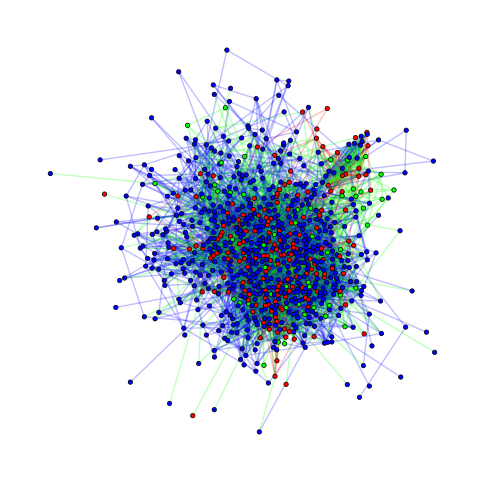

In [47]:
plt.figure(figsize=[6, 6])
nx.draw_networkx_nodes(
    G = G_cns_fb_lcc, 
    pos = nx.get_node_attributes(G=G_cns_fb_lcc, name='pos'), 
    node_size = 10, 
    node_color = list(nx.get_node_attributes(G=G_cns_fb_lcc, name='sex').values()), 
    cmap = plt.cm.brg, 
    linewidths = .5, 
    edgecolors = 'black'
)
nx.draw_networkx_edges(
    G = G_cns_fb_lcc, 
    pos = nx.get_node_attributes(G=G_cns_fb_lcc, name='pos'), 
    edge_color = list(nx.get_edge_attributes(G=G_cns_fb_lcc, name='sex').values()), 
    alpha = .25, 
    edge_cmap = plt.cm.brg
)
plt.box(False)
plt.savefig('results/G_cns_fb_lcc.pdf')
plt.savefig('results/G_cns_fb_lcc.png')

#### Text messages

The network of who has sent a text message to whom is structurally more interesting:

In [48]:
edgelist_cns_sms = pd.read_csv('../data/CNS/sms.csv')
edgelist_cns_sms.head()

,timestamp,sender,recipient
0,18,370,512
1,37,512,370
2,126,370,512
3,134,0,512
4,312,137,136


In [49]:
with open('../data/CNS/sms.README', 'r') as f:
    print(f.read())

column names:
	- timestamp
	- sender
	- recipient



Text message relations are directed and unweighted. The timestamps are seconds after the beginning of the four-week experiment in 2013. The first week ends after $7*24*60*60=604800$ seconds. The following histogram where each bar is a day and dotted vertical lines demarcate weeks shows that there is a characteristic weekly activity pattern:

In [50]:
import seaborn as sns

In [51]:
sns.set_theme()

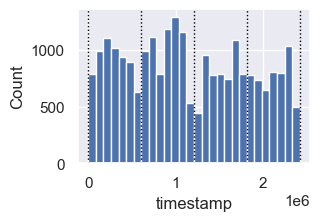

In [52]:
plt.figure(figsize=[3, 2])
edgelist_cns_sms['timestamp'].hist(bins=28)
for i in range(5):
    plt.axvline(x=604800*i, color='black', linewidth=1, linestyle='dotted')
plt.xlabel('timestamp')
plt.ylabel('Count')
plt.show()

We now want to create a directed text message graph where the number of short messages among a node pair is used as an edge weight. We define an `aggregate_edgelist()` function that does this for us and which we can use for other applications later on:

In [53]:
def aggregate_edges(df, time, source, target, weight, time_zero, window_size, inclusive, fun):
    '''
    Aggregates edges from a time-stamped edge list according to an aggregation function.
    
    Parameters:
        df : Pandas DataFrame
            Time-stamped edgelist.
        time : String
            Name of the column in df which contains the timestamp.
        source : String
            Name of the column in df which contains the source node.
        target : String
            Name of the column in df which contains the target node.
        weight : String or None
            Name of the column in df which contains the edge weights. If None, a column with unit edge weights will be created.
        time_zero : String or numerical
            Time where aggregation begins.
        window_size : String or numerical
            Size of the time window used for aggregation.
        inclusive : {'both', 'neither', 'left', 'right'}
            Include boundaries. Whether to set each bound as closed or open.
        fun : {'max', 'sum', 'mean'}
            Aggregation method. Either the maximum edge weight is used, weights are summer, or weights are averaged.
    
    Returns:
        Aggregated edge list consisting of a node pair and a weight column.
    '''
    if weight == None:
        weight = 'weight'
        df[weight] = 1
    if fun == 'max':
        df_agg = df[df[time].between(left=time_zero, right=time_zero+window_size, inclusive=inclusive)].groupby([source, target]).max().reset_index()[[source, target, weight]]
    if fun == 'sum':
        df_agg = df[df[time].between(left=time_zero, right=time_zero+window_size, inclusive=inclusive)].groupby([source, target]).sum().reset_index()[[source, target, weight]]
    if fun == 'mean':
        df_agg = df[df[time].between(left=time_zero, right=time_zero+window_size, inclusive=inclusive)].groupby([source, target]).mean().reset_index()[[source, target, weight]]
    return df_agg

Create an aggregated edgelist for the first week of text messages (`time_zero = 0` and `time_right = 604800`), summing up the number of messages. Each row in `edgelist_cns_sms` is a short message; there is no column for edge weights. Hence, set `weight = None`:

In [54]:
edgelist_cns_sms_week1 = aggregate_edges(
    df = edgelist_cns_sms, 
    time = 'timestamp', 
    source = 'sender', 
    target = 'recipient', 
    weight = None, 
    time_zero = 0, 
    window_size = 604800, 
    inclusive = 'left', 
    fun = 'sum'
)
edgelist_cns_sms_week1.head()

,sender,recipient,weight
0,0,512,34
1,1,345,2
2,3,49,6
3,3,357,23
4,4,221,2


In [55]:
edgelist_cns_sms_week1['weight'].max()

540

Since the distribution of edge weights is rather skewed (two users exchanged a maximum of 540 messages in that week), take the natural logarithm of the edge weights:

In [56]:
import numpy as np

In [57]:
edgelist_cns_sms_week1['weight'] = np.log(edgelist_cns_sms_week1['weight']) + 1

Create the directed weighted graph and internalize the node attribute:

In [58]:
G_cns_sms_week1 = nx.from_pandas_edgelist(
    df = edgelist_cns_sms_week1, 
    source = 'sender', 
    target = 'recipient', 
    edge_attr = ['weight'], 
    create_using = nx.DiGraph
)
G_cns_sms_week1.add_nodes_from(nodelist_cns['user'])
nx.set_node_attributes(G=G_cns_sms_week1, values=node_attr_sex)

Increasing the number of `iterations` of the spring embedding algorithm from 10 (less than the default value) to 250 (more than the default value) refines the layout (while requiring an increase of `k`). This time we also use the edge weights for layouting. Initializing the spring embedder with a `random_layout()` causes nodes to be in comparable positions in the three plots. To put all three networks in one plot, use Matplotlib `subplots()` and loop through the three parameter settings defined by the `k` and `iterations` lists. You can address each subplot via the `axs` array which, in this case, has three rows. Uncomment the edge weight parameter to change the `width` of edges (and see how that makes the plot more unreadable):

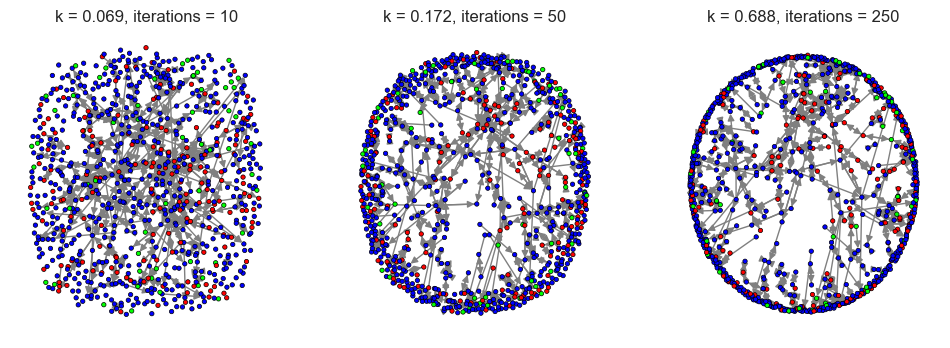

In [59]:
k = [0.069, 0.172, 0.688]
iterations = [10, 50, 250]
pos_cns_sms_week1_random = nx.random_layout(G=G_cns_sms_week1)

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for i in range(3):
    pos_cns_sms_week1_spring = nx.spring_layout(
        G = G_cns_sms_week1, 
        k = k[i], 
        pos = pos_cns_sms_week1_random, 
        iterations = iterations[i], 
        weight = 'weight'
    )
    axs[i].set_title('k = '+str(k[i])+', iterations = '+str(iterations[i]))
    nx.draw(
        G = G_cns_sms_week1, 
        pos = pos_cns_sms_week1_spring, 
        ax = axs[i], 
        node_size = 10, 
        node_color = list(nx.get_node_attributes(G=G_cns_sms_week1, name='sex').values()), 
        cmap = plt.cm.brg, 
        linewidths = .5, 
        edgecolors = 'black', 
        #width = list(nx.get_edge_attributes(G=G_cns_sms_week1, name='weight').values()), 
        edge_color = 'gray'
    )

Note the existence of many unconnected parts of the network which are increasingly pushed to the periphery as `k` and `iterations` increase. The Graphviz `sfdp` algorithm separates these components well:

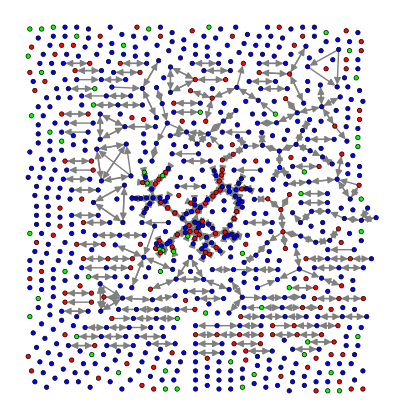

In [60]:
plt.figure(figsize=[4, 4])
nx.draw(
    G = G_cns_sms_week1, 
    pos = nx.nx_agraph.graphviz_layout(G=G_cns_sms_week1, prog='sfdp'), 
    node_size = 10, 
    node_color = list(nx.get_node_attributes(G=G_cns_sms_week1, name='sex').values()), 
    cmap = plt.cm.brg, 
    linewidths = .5, 
    edgecolors = 'black', 
    #width = list(nx.get_edge_attributes(G=G_cns_sms_week1, name='weight').values()), 
    edge_color = 'gray'
)

We have already learned about connected components in the simple friendship graph. The network of text messages is directed. Components are also defined for DiGraphs. In a weakly connected component, nodes are reachable not taking edge directions info account. NetworkX provides functions for [strong](https://networkx.org/documentation/stable/reference/algorithms/component.html#strong-connectivity) and [weak](https://networkx.org/documentation/stable/reference/algorithms/component.html#weak-connectivity) connectivity. The whole graph is not weakly connected:

In [61]:
nx.is_weakly_connected(G_cns_sms_week1)

False

There are that many weakly connected components:

In [62]:
nx.number_weakly_connected_components(G_cns_sms_week1)

532

This is the ordered list of node sets that make up those components (the largest comes first):

In [63]:
cc_cns_sms_week1 = sorted(nx.weakly_connected_components(G_cns_sms_week1), key=len, reverse=True)

Extract the largest weakly connected component from the graph and store it:

In [64]:
G_cns_sms_week1_lcc = G_cns_sms_week1.subgraph(cc_cns_sms_week1[0])

Now plot the component using the last spring layout (k = 0.688, iterations = 250):

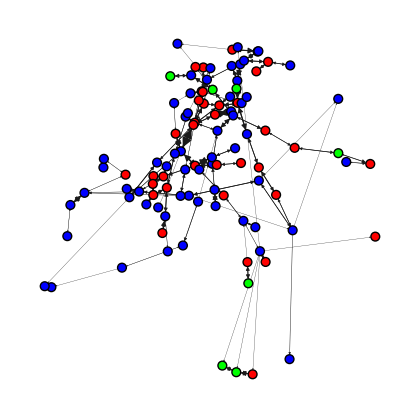

In [65]:
plt.figure(figsize=[4, 4])
nx.draw(
    G = G_cns_sms_week1_lcc, 
    pos = pos_cns_sms_week1_spring, 
    node_size = 40, 
    node_color = list(nx.get_node_attributes(G=G_cns_sms_week1_lcc, name='sex').values()), 
    cmap = plt.cm.brg, 
    linewidths = 1., 
    edgecolors = 'black', 
    width = [width/5 for width in list(nx.get_edge_attributes(G=G_cns_sms_week1_lcc, name='weight').values())], 
    arrowsize = [2*width for width in list(nx.get_edge_attributes(G=G_cns_sms_week1_lcc, name='weight').values())], 
    #edge_color = 'gray'
)

Let us try another standard layout algorithm. The algorithm by Kamada and Kawai discards edge directions and places nodes far away from each other if they are connected by long sequences of edges. [`kamada_kawai_layout()`](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.kamada_kawai_layout.html) should be used cautiously for networks with many components because it layouts component by component and stacks them all on top of each other. Use the layout from spring embedding as an initial `pos`ition (line 3). That initial layout will be refined, but using it ensures that nodes that were, for example, positioned in the upper right part of the plot in the initial layout will also tend to be in that region in the refined layout:

In [66]:
pos_cns_sms_week1_kamada_kawai = nx.kamada_kawai_layout(
    G = G_cns_sms_week1_lcc, 
    pos = pos_cns_sms_week1_spring, 
    weight = 'weight'
)

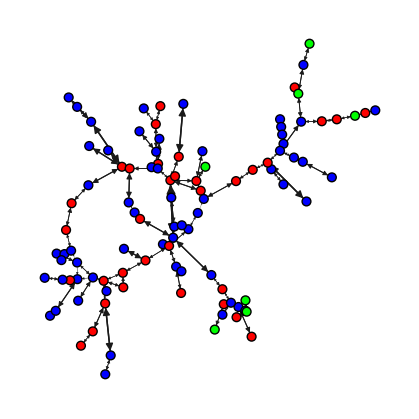

In [67]:
plt.figure(figsize=[4, 4])
nx.draw(
    G = G_cns_sms_week1_lcc, 
    pos = pos_cns_sms_week1_kamada_kawai, 
    node_size = 40, 
    node_color = list(nx.get_node_attributes(G=G_cns_sms_week1_lcc, name='sex').values()), 
    cmap = plt.cm.brg, 
    linewidths = 1., 
    edgecolors = 'black', 
    width = [width/5 for width in list(nx.get_edge_attributes(G=G_cns_sms_week1_lcc, name='weight').values())], 
    arrowsize = [2*width for width in list(nx.get_edge_attributes(G=G_cns_sms_week1_lcc, name='weight').values())], 
    #edge_color = 'gray'
)

This layout uncovers that the largest component of the text messaging network has a very stringy nature and that there are hardly any densely connected groups.

For additional layouts see Ma & Seth (2020, 21–29).

## 5.3. Multilayer networks

|<img src='images/mux_models.png' style='float: none; width: 480px'>|
|:--|
|<em style='float: center'>**Figure 3**: Spectrum of multilayer networks (Copyright 2013-2033, Manlio De Domenico, [source](https://doi.org/10.17605/OSF.IO/GY53K))</em>|

Artime *et al.* (2022, p. 9) conceptualize the four kinds of multilayer networks shown in ***figure 3***. In the non-interconnected model or **edge-colored multigraphs** there is no interlayer connectivity other than that nodes can have edges in multiple layers (with multiple colors). NetworkX realized this by creating parallel edges and assigning those a key which defines the layer. Here, we only work with the non-interconnected multilayer model. In [Session 7: Network analysis](), you will learn how to utilize those layers in analysis. The other, interconnected models invole well-defined interlayer connectivity and allow for modeling interdependencies where, for example, nodes control or are controlled by nodes in other networks. Such analyses are quite advanced and require data structures that are not implemented in NetworkX. The [Pymnet](http://www.mkivela.com/pymnet/) library which builds on top of NetworkX is a first step towards more user-friendly multilayer analysis.

#### Text messages and phone calls

We will now load the edgelists of the text message and phone call networks, filter them, combine them into one edgelist, and create an edge-colored multigraph. Load the list of calls:

In [68]:
edgelist_cns_calls = pd.read_csv('../data/CNS/calls.csv')
edgelist_cns_calls.head()

,timestamp,caller,callee,duration
0,184,300,301,121
1,3920,512,299,670
2,5623,301,300,504
3,9252,401,457,-1
4,15466,512,0,5


In [69]:
with open('../data/CNS/calls.README', 'r') as f:
    print(f.read())

column names:
	- timestamp
	- calling user
	- call recipient
	- duration (-1 means a missed call)




Text message relations are directed and weighted by the `duration` of a call. Remove missed calls and calls with zero duration:

In [70]:
edgelist_cns_calls = edgelist_cns_calls[edgelist_cns_calls['duration'] > 0]

Aggregate the edges, this time taking the mean call duration:

In [71]:
edgelist_cns_calls_week1 = aggregate_edges(
    df = edgelist_cns_calls, 
    time = 'timestamp', 
    source = 'caller', 
    target = 'callee', 
    weight = 'duration', 
    time_zero = 0, 
    window_size = 604800, 
    inclusive = 'left', 
    fun = 'mean'
)
edgelist_cns_calls_week1.head()

,caller,callee,duration
0,0,512,3.0
1,4,424,16.0
2,6,27,2.0
3,6,406,52.0
4,8,557,17.5


In [72]:
edgelist_cns_calls_week1['duration'].max()

1440.0

Again the edge weight distribution is quite skewed. Take the logarith, this time with base 10:

In [73]:
edgelist_cns_calls_week1['duration'] = np.log10(edgelist_cns_calls_week1['duration']) + 1

Taking the logarithm with different bases for messages and calls results in comparable means after transformation. This may be desired when creating a multilayer graph:

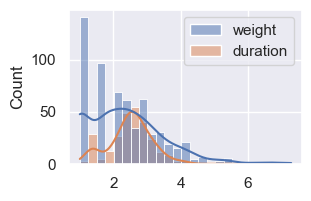

In [74]:
plt.figure(figsize=[3, 2])
sns.histplot(
    data=(edgelist_cns_sms_week1['weight'], edgelist_cns_calls_week1['duration']), 
    kde=True
)
plt.show()

Before combining both edgelists into one, we harmonize their column names:

In [75]:
edgelist_cns_sms_week1.columns = ['source', 'target', 'weight']
edgelist_cns_calls_week1.columns = ['source', 'target', 'weight']

Finally, we add layer attributes:

In [76]:
edgelist_cns_sms_week1['layer'] = 0
edgelist_cns_calls_week1['layer'] = 1

Now that the two edge lists are ready, we concatenate them, sorting by edge weight ascendingly and resetting the index:

In [77]:
edgelist_cns_mobile_week1 = pd.concat([edgelist_cns_sms_week1, edgelist_cns_calls_week1]).sort_values(by='weight', ascending=True).reset_index(drop=True)
edgelist_cns_mobile_week1

,source,target,weight,layer
0,494,163,1.000000,0
1,278,31,1.000000,0
2,284,449,1.000000,0
3,292,325,1.000000,0
4,292,427,1.000000,0
...,...,...,...,...
873,578,176,6.459586,0
874,176,578,6.638355,0
875,481,296,6.733341,0
876,617,279,7.220590,0


Use the `weight` and `layer` parameters in the `from_pandas_edgelist()` function, now creating a `MultiDiGraph` (directed multilayer network):

In [78]:
G_cns_mobile_week1 = nx.from_pandas_edgelist(
    df = edgelist_cns_mobile_week1, 
    source = 'source', 
    target = 'target', 
    edge_attr = 'weight', 
    create_using = nx.MultiDiGraph, 
    edge_key = 'layer'
)
G_cns_mobile_week1.add_nodes_from(nodelist_cns['user'])
nx.set_node_attributes(G=G_cns_mobile_week1, values=node_attr_sex)

Each layer is defined by a key, and the keys can be viewed by:

In [79]:
#G_cns_mobile_week1.edges.keys()

Again we extract the largest weakly connected component...

In [80]:
G_cns_mobile_week1_lcc = G_cns_mobile_week1.subgraph(sorted(nx.weakly_connected_components(G_cns_mobile_week1), key=len, reverse=True)[0])

and create and internalize a layout:

In [81]:
pos_cns_mobile_week1_kamada_kawai = nx.kamada_kawai_layout(
    G = G_cns_mobile_week1_lcc, 
    weight = 'weight'
)
nx.set_node_attributes(G=G_cns_mobile_week1_lcc, values=pos_cns_mobile_week1_kamada_kawai, name='pos')

The network is now ready for visualization. A list of layer keys is created and used for the `edge_color` parameter (line 20). Using colored nodes in addition to the colored edges may be too much information to process visually. Hence, we decide to encode the 'sex' attribute as node shapes. For that purpose, we must use the `draw_networkx_nodes()` function. First we loop through the three categories (male, female, and unknown) (lines 4–14), create a nodelist for each (line 8), and give all nodes from the same category the same shape (line 11). Then we draw the edges where we can now use a transparency parameter `alpha` that only applies to the edges (lines 15–24):

In [82]:
import os

In [83]:
directory = 'results'
if not os.path.exists(directory):
    os.makedirs(directory)

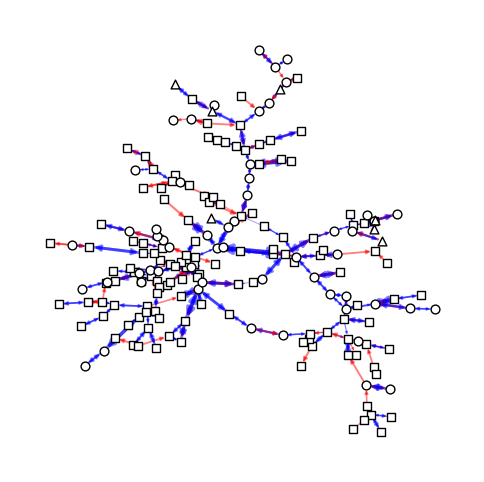

In [84]:
shapes = ['s', 'o', '^']

plt.figure(figsize=[6, 6])
for i in range(3):
    nx.draw_networkx_nodes(
        G = G_cns_mobile_week1_lcc, 
        pos = nx.get_node_attributes(G=G_cns_mobile_week1_lcc, name='pos'), 
        nodelist = [node for node, attribute in G_cns_mobile_week1_lcc.nodes(data=True) if attribute['sex'] == i], 
        node_size = 40, 
        node_color = 'white', 
        node_shape = shapes[i], 
        linewidths = 1., 
        edgecolors = 'black'
    )
nx.draw_networkx_edges(
    G = G_cns_mobile_week1_lcc, 
    pos = nx.get_node_attributes(G=G_cns_mobile_week1_lcc, name='pos'), 
    width = [width/2 for width in list(nx.get_edge_attributes(G=G_cns_mobile_week1_lcc, name='weight').values())], 
    arrowsize = [2*width for width in list(nx.get_edge_attributes(G=G_cns_mobile_week1_lcc, name='weight').values())], 
    edge_color = [key for u, v, key in G_cns_mobile_week1_lcc.edges.keys()], 
    alpha = .5, 
    edge_cmap = plt.cm.bwr, 
    node_size = 40
)
plt.box(False)
plt.savefig('results/G_cns_mobile_week1_lcc.pdf')
plt.savefig('results/G_cns_mobile_week1_lcc.png')

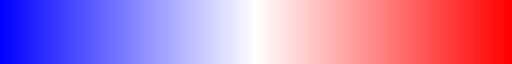

In [85]:
plt.cm.bwr

In this network plot, the `bwr` colormap is used to color the layers. This colormap diverges from blue to red. Matplotlib maps the key 0 to blue and 1 to red. The result is an edge-colored multigraph.

## 5.4. Network snapshots from link streams

The text message and phone call edgelists are examples of **link streams** where edges are time-stamped, and edges among pairs of nodes can appear, be repeated, or terminated. Such continuous longitudinal data is well suited to study human behavior (*e.g.*, institutionalization, mechanisms of structural stability and change). The researcher is confronted with the problem how to handle these timestamps. Relational event modeling allows for modeling actions within social settings in a continuous way (Butts 2008). These models require advanced statistical knowledge and, at this point, programming skills outside Python. For example, the [relevent](https://cran.r-project.org/web/packages/relevent/index.html) package uses an R interface.

Most analyses use link streams in a discrete way, that means, the data is aggregated into a series of **network snapshots**, like the `..._week1` networks created above. The first way to aggregate link streams is to use constant aggregation time windows. These typically rely on dates (*e.g.*, days, weeks, months) and times (*e.g.*, hours, minutes, seconds). Chosing this window is user-defined and can be quite arbitrary – why aggregate over three hours, not four? Therefore, a second way is to aggregate until a structural criterion is met (Soundarajan *et al.* 2016). Such methods can – and typically do – result in variable time windows. Below, we will aggregate edges by clock and by network connectivity.

#### Physical proximity

The physical proximity relations of the CNS dataset resemble a link stream at high temporal resolution. Physical proximity of two students is measured using the Bluetooth devices of the cell phones handed out to the students. These devices scan their environment every five minutes and record the presence of other phones. All instances of students A and B discovering each other were identified, and the larger signal strength (`rssi`) is reported (Sapiezynski et al. 2019).

In [86]:
edgelist_cns_bt = pd.read_csv('../data/CNS/bt_symmetric.csv.gz')
edgelist_cns_bt.head()

,# timestamp,user_a,user_b,rssi
0,0,0,-1,0
1,0,1,-1,0
2,0,2,-1,0
3,0,3,-2,-88
4,0,5,-1,0


In [87]:
with open('../data/CNS/bt_symmetric.README', 'r') as f:
    print(f.read())

column names:
	- timestamp
	- user A 
	- user B 
	- received signal strength

Notes:
Empty scans are marked with user B = -1 and RSSI = 0
Scans of devices outside of the experiment are marked with user B = -2. All non-experiment devices are given the same ID.



Remove relations involving devices not participating in the experiment as well as four nonsensical relations with positive signal strengths:

In [88]:
edgelist_cns_bt = edgelist_cns_bt[(edgelist_cns_bt['user_b'] >= 0) & (edgelist_cns_bt['rssi'] < 0)].reset_index(drop=True)

RSSI is a value between -100 and 0. As a rule of thumb, an RSSI signal strength of -75 means that two devices are 1 meter apart (Mones *et al.* 2017). Values closer to 0 mean devices are also closer. Hence, according to the histogram and the filtering in the following two cells, about 18% of all relations are within a face-to-face interaction distance of 1 meter:

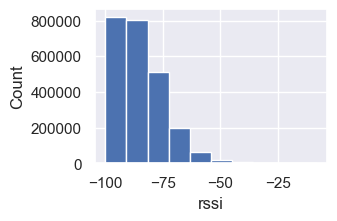

In [89]:
plt.figure(figsize=[3, 2])
edgelist_cns_bt['rssi'].hist()
plt.xlabel('rssi')
plt.ylabel('Count')
plt.show()

In [90]:
len(edgelist_cns_bt[edgelist_cns_bt['rssi'] >= -75]) / len(edgelist_cns_bt)

0.18074744206654234

Negative scores cannot be used as edge weights. Therefore, add a new 'strength' column that shifts the RSSI score into the positive range:

In [91]:
edgelist_cns_bt['strength'] = edgelist_cns_bt['rssi'] + 100

#### Aggregating edges by clock

Sekara *et al.* (2016) have shown that social groups can be uncovered in the network of physical proximity by tuning the time window for aggregation. When they plotted the network of who was proximate to whom during a whole day, it did not reveal anything interesting. The network of social relations aggregated over one hour, however, exhibited a large connected component with visible groups. When aggregating edges over one scanning period (5 minutes), groups were isolated (Sekara *et al.* 2016, fig. 1).

We use comparable time windows. 1 day, 3 hours, and 15 minutes correspond to 86400, 10800, and 900 seconds, respectively. Use a subplot for each window defined in `window_sizes` and named in `window_labels`. The edge 'strength' attribute values are divided by 20 using list comprehension to make thinner edges (line 36):

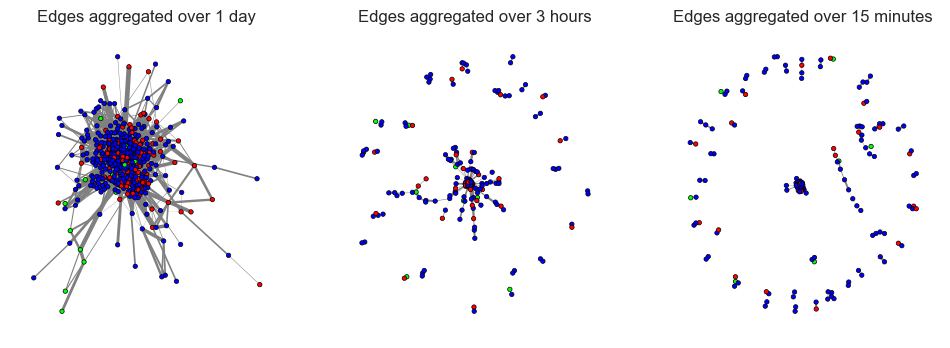

In [92]:
time_zero = 12 * 86400
window_sizes = [86400, 10800, 900]
window_labels = ['1 day', '3 hours', '15 minutes']

fig, axs = plt.subplots(1, len(window_sizes), figsize=(12, 4))
for i in range(len(window_sizes)):
    df_agg = aggregate_edges(
        df = edgelist_cns_bt, 
        time = '# timestamp', 
        source = 'user_a', 
        target = 'user_b', 
        weight = 'strength', 
        time_zero = time_zero, 
        window_size = window_sizes[i], 
        inclusive = 'left', 
        fun = 'max'
    )
    G_agg = nx.from_pandas_edgelist(
        df = df_agg, 
        source = 'user_a', 
        target = 'user_b', 
        edge_attr = ['strength'], 
        create_using = nx.Graph
    )
    #G_agg.add_nodes_from(nodelist_cns['user'])
    nx.set_node_attributes(G=G_agg, values=node_attr_sex)
    axs[i].set_title('Edges aggregated over '+window_labels[i])
    nx.draw(
        G = G_agg, 
        ax = axs[i], 
        node_size = 10, 
        node_color = list(nx.get_node_attributes(G=G_agg, name='sex').values()), 
        cmap = plt.cm.brg, 
        linewidths = .5, 
        edgecolors = 'black', 
        width = [width/20 for width in list(nx.get_edge_attributes(G=G_agg, name='strength').values())], 
        edge_color = 'gray'
    )

As in the paper by Sekara *et al.*, we uncover different network structures at varying windows sizes. The graph on the right is a subgraph of the graph in the middle which is a subgraph of the graph on the left.

Interested in 28 networks of 1 day each, displayed in `i` = 4 rows and `j` = 7 columns? Initialize a subplot array with shape (4, 7) and loop through each dimension. Again, we are using our custom `aggregate_edges()` function. Note that we increase `time_zero` by the `window_size` in the last line to create the day snapshots:

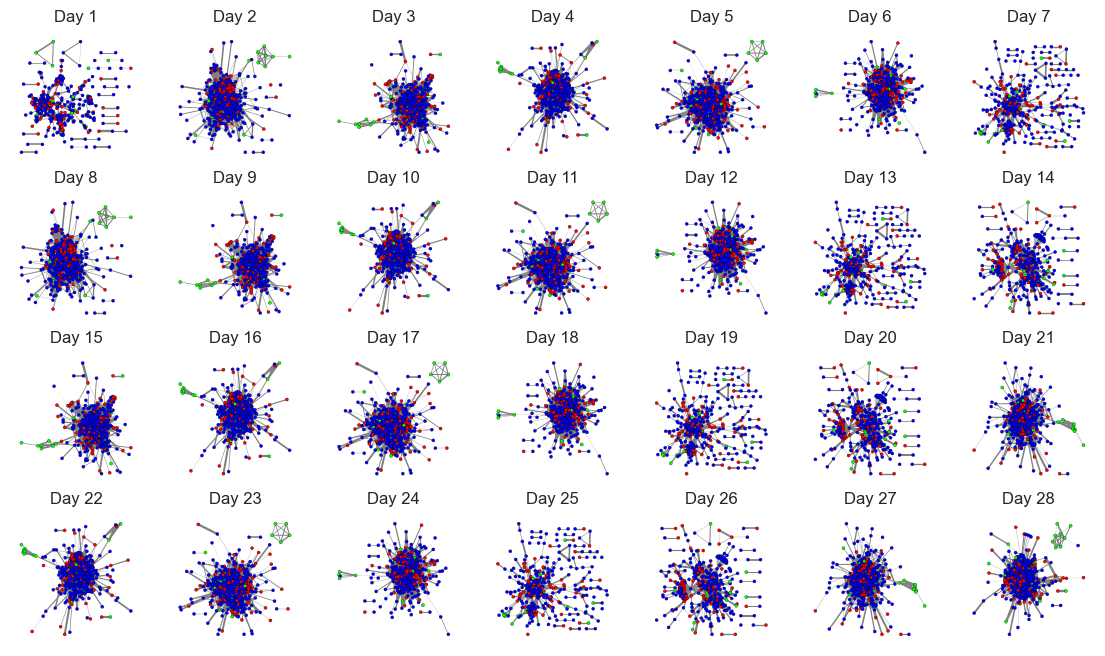

In [93]:
time_zero = 0
window_size = 86400
edgelists_cns_bt_day = []

fig, axs = plt.subplots(4, 7, figsize=(14, 8))
for i in range(4):
    for j in range(7):
        edgelists_cns_bt_day.append(aggregate_edges(
            df = edgelist_cns_bt, 
            time = '# timestamp', 
            source = 'user_a', 
            target = 'user_b', 
            weight = 'strength', 
            time_zero = time_zero, 
            window_size = window_size, 
            inclusive = 'left', 
            fun = 'max'
        ))
        G_agg = nx.from_pandas_edgelist(
            df = edgelists_cns_bt_day[i+j], 
            source = 'user_a', 
            target = 'user_b', 
            edge_attr = ['strength'], 
            create_using = nx.Graph
        )
        #G_agg.add_nodes_from(nodelist_cns['user'])
        nx.set_node_attributes(G=G_agg, values=node_attr_sex)
        axs[i, j].set_title('Day '+str(i*7+j+1))
        nx.draw(
            G = G_agg, 
            pos = nx.nx_agraph.graphviz_layout(G=G_agg, prog='sfdp'), 
            ax = axs[i, j], 
            node_size = 5, 
            node_color = list(nx.get_node_attributes(G=G_agg, name='sex').values()), 
            cmap = plt.cm.brg, 
            linewidths = .2, 
            edgecolors = 'black', 
            width = [strength/40 for strength in list(nx.get_edge_attributes(G=G_agg, name='strength').values())], 
            edge_color = 'gray'
        )
        time_zero += window_size

Students are not as connected in the first and last columns. Supposedly, these are the days of the weekend. Isolated nodes are not shown but can be shown by uncommenting line 26. Note that the edgelists for all 28 days are stored in the `edgelists_cns_bt_day` list of dataframes. You can use these edgelists, for example, to create a multilayer network. Access the first edgelist like this:

In [94]:
#edgelists_cns_bt_day[0]

#### Aggregating edges by network connectivity

Many networks of the 28 daily snapshots look like hairballs. Reducing the aggregation window size will reveal a more patterned structure. But what window size to use? For some snapshots 6 hours may be best, for others 12. Here, we use a simple method that stops aggregation when at least a certain fraction `p_criterion` of the students are connected in the largest component. It is an application of the framework proposed by Soundarajan *et al.* (2016).

Imagine that we want to study how students behave (who interacts with whom) on day 2 between 9am and 5pm. And let us say that we are interested in face-to-face interactions where students are within 1m of each other. First filter the edgelist to obtain very-close-range proximity:

In [95]:
edgelist_cns_bt_f2f = edgelist_cns_bt[edgelist_cns_bt['rssi'] >= -75]

Now define integer variables for `time_begin` and `time_end`, set `p_criterion = .1` (you can change it to experiment!), and prepare some empty lists in which results will be stored (lines 5–8). Then enter a loop where edges are aggregated `while time_begin < time_end` (line 10). In this aggregation loop, the empirical fraction `p` of nodes in the largest component is computed (line 32) as the `window_size` is increased (line 33). Aggregation continues `while p < p_criterion` (line 13). When `p` is larger or equal `p_criterion`, aggregation of the next snapshot will start (line 42). Aggregation will also stop when the end of the analysis period has been reached (`time_begin + window_size > time_end` in line 34–36):

In [96]:
time_begin = (24 + 9) * 60 * 60
time_end = (24 + 17) * 60 * 60
p_criterion = .5

time_windows = []
edgelists_cns_bt_f2f_p = []
Gs_cns_bt_f2f_p = []
counter = 1

while time_begin < time_end:
    p = 0.
    window_size = 300
    while p < p_criterion:
        df_agg = aggregate_edges(
            df = edgelist_cns_bt_f2f, 
            time = '# timestamp', 
            source = 'user_a', 
            target = 'user_b', 
            weight = 'strength', 
            time_zero = time_begin, 
            window_size = window_size, 
            inclusive = 'left', 
            fun='max'
        )
        G_agg = nx.from_pandas_edgelist(
            df = df_agg, 
            source = 'user_a', 
            target = 'user_b', 
            edge_attr = ['strength'], 
            create_using = nx.Graph
        )
        p = G_agg.subgraph(sorted(nx.connected_components(G_agg), key=len, reverse=True)[0]).number_of_nodes() / G_agg.number_of_nodes()
        window_size += 300
        if time_begin + window_size > time_end:
            print('Snapshot ' + str(counter) + ' is not complete, p =', round(p, 2))
            break
    print('Snapshot ' + str(counter) + ' is from ' + str(time_begin) + ' to ' + str(time_begin + window_size - 300))
    time_windows.append(window_size - 300)
    counter += 1
    edgelists_cns_bt_f2f_p.append(df_agg)
    Gs_cns_bt_f2f_p.append(G_agg)
    time_begin += window_size

Snapshot 1 is from 118800 to 125400
Snapshot 2 is from 125700 to 129600
Snapshot 3 is from 129900 to 132600
Snapshot 4 is from 132900 to 141900
Snapshot 5 is not complete, p = 0.25
Snapshot 5 is from 142200 to 147600


There are this many snapshots, the last of which is not complete):

In [97]:
len(edgelists_cns_bt_f2f_p)

5

For the stated value of `p_criterion`, the distribution of snapshot window sizes is:

In [98]:
pd.DataFrame(data=time_windows, columns=['time_window']).groupby('time_window').size()

time_window
2700    1
3900    1
5400    1
6600    1
9000    1
dtype: int64

Temporal networks can be represented as multilayer networks (Menczer *et al.* 2020, pp. 26–28). Next, we want to plot a multilayer network where layers are snapshots. Create an empty dataframe `edgelist_cns_bt_f2f_p` and add snapshot edgelist by snapshot edgelist:

In [99]:
edgelist_cns_bt_f2f_p = pd.DataFrame(columns = ['user_a', 'user_b', 'strength', 'snapshot'])
for snapshot in range(len(edgelists_cns_bt_f2f_p) - 1):
    df = edgelists_cns_bt_f2f_p[snapshot].copy()
    df['snapshot'] = snapshot
    edgelist_cns_bt_f2f_p = pd.concat([edgelist_cns_bt_f2f_p, df])
edgelist_cns_bt_f2f_p = edgelist_cns_bt_f2f_p.sort_values(by='strength', ascending=True).reset_index(drop=True)

Construct the undirected MultiGraph with the 'sex' node attributes:

In [100]:
G_cns_bt_f2f_p = nx.from_pandas_edgelist(
    df = edgelist_cns_bt_f2f_p, 
    source = 'user_a', 
    target = 'user_b', 
    edge_attr = ['strength'], 
    create_using = nx.MultiGraph, 
    edge_key = 'snapshot'
)
G_cns_bt_f2f_p.add_nodes_from(nodelist_cns['user'])
nx.set_node_attributes(G=G_cns_bt_f2f_p, values=node_attr_sex)

Extract the largest connected component...

In [101]:
G_cns_bt_f2f_p_lcc = G_cns_bt_f2f_p.subgraph(sorted(nx.connected_components(G_cns_bt_f2f_p), key=len, reverse=True)[0])

and plot it, again using node shapes for the attribute and layer keys as the edge color:

In [102]:
pos_cns_bt_f2f_p_lcc_kamada_kawai = nx.kamada_kawai_layout(
    G = G_cns_bt_f2f_p_lcc, 
    weight = 'weight'
)
nx.set_node_attributes(G=G_cns_bt_f2f_p_lcc, values=pos_cns_bt_f2f_p_lcc_kamada_kawai, name='pos')

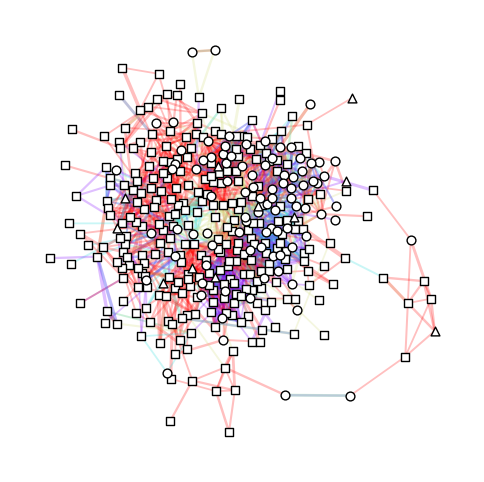

In [103]:
plt.figure(figsize=[6, 6])
for i in range(3):
    nx.draw_networkx_nodes(
        G = G_cns_bt_f2f_p_lcc, 
        pos = nx.get_node_attributes(G=G_cns_bt_f2f_p_lcc, name='pos'), 
        nodelist = [node for node, attribute in G_cns_bt_f2f_p_lcc.nodes(data=True) if attribute['sex'] == i], 
        node_size = 40, 
        node_color = 'white', 
        node_shape = shapes[i], 
        linewidths = 1., 
        edgecolors = 'black'
    )
nx.draw_networkx_edges(
    G = G_cns_bt_f2f_p_lcc, 
    pos = nx.get_node_attributes(G=G_cns_bt_f2f_p_lcc, name='pos'), 
    width = [width/20 for width in list(nx.get_edge_attributes(G=G_cns_bt_f2f_p_lcc, name='strength').values())], 
    edge_color = [key for u, v, key in G_cns_bt_f2f_p_lcc.edges.keys()], 
    alpha = .25, 
    edge_cmap = plt.cm.rainbow, 
    node_size = 40
)
plt.box(False)
plt.savefig('results/G_cns_bt_f2f_p_lcc.pdf')
plt.savefig('results/G_cns_bt_f2f_p_lcc.png')

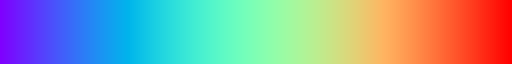

In [104]:
plt.cm.rainbow

This plot is structurally interesting as it seems to exhibit groups of nodes that are separated by structural gaps (in [Session 7: Network analysis](), we will analyze this). Using the `rainbow` colormap to color edges means that purple will be used for the first snapshot, red for the last one, and intermediate colors for the snapshots in between. The fact that different colors dominate different regions of the graph means that the associated node groups tend to meet at different times.

## 5.5. Bipartite networks

The richness of Digital Behavioral Data can take the form of multimodality, where units of analysis belong to different categories (have different modes). Here, we introduce how to handle bipartite or 2-mode network data (Platt 2019, chapter 4; Ma & Seth 2020, 89–101). A **bipartite graph** $B=(U, V, E)$ consists of two disjoint and independent sets of vertices $U$ and $V$ and an edge set $E$. Disjoint means that $U$ and $V$ have no vertex in common, and independent means that vertices of a set are not allowed to be connected to vertices of the same set. Hence, edges are only permitted between vertices belonging to different sets.

|<img src='images/bipartite_graph.svg' style='float: none; width: 240px'>|
|:--|
|<em style='float: center'>**Figure 4**: Bipartite network (Wikimedia Commons. [Source](https://commons.wikimedia.org/wiki/File:Simple_bipartite_graph;_two_layers.svg))</em>|

The network in ***figure 3*** may depict five persons (in red) having participated in one to three of four events (in blue). By using matrix multiplication, this network can be [projected](https://en.wikipedia.org/wiki/Bipartite_network_projection) into two unipartite or 1-mode networks: a network of persons that are connected if they participated in the same events and a network of events that are connected if the same persons participated in them. We will now discuss how bipartite network data can be organized and how you can project the nodes of one mode into edges among nodes of the other mode. The CNS does not include bipartite data. We use a classical dataset:

#### Southern women data

[Southern women](https://networkdata.ics.uci.edu/netdata/html/davis.html) is a dataset of 18 women observed in the 1930s as they met in a series of 14 social events over a period of nine months. The matrix by Davis *et al.* reports which women met for which events. The dataset is small, so it can be stored as a dense matrix (where dense means that zeros are also saved and use memory):

In [105]:
matrix_davis = pd.DataFrame(data=[[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], [0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0], [0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0], [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0], [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1], [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1], [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0], [0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0], [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], [0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0], [1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1]], index=['Eleanor', 'Brenda', 'Dorothy', 'Verne', 'Flora', 'Olivia', 'Laura', 'Evelyn', 'Pearl', 'Ruth', 'Sylvia', 'Katherine', 'Myrna', 'Theresa', 'Charlotte', 'Frances', 'Helen', 'Nora'], columns=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
matrix_davis

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Eleanor,0,1,0,1,0,0,0,1,0,0,0,1,0,0
Brenda,0,1,0,1,0,0,1,1,0,1,0,1,1,0
Dorothy,0,0,0,0,0,1,0,0,0,0,0,1,0,0
Verne,0,0,0,1,1,1,0,0,0,0,0,1,0,0
Flora,1,0,0,0,0,1,0,0,0,0,0,0,0,0
Olivia,1,0,0,0,0,1,0,0,0,0,0,0,0,0
Laura,0,1,1,1,0,0,1,1,0,1,0,1,0,0
Evelyn,0,1,1,0,0,1,1,1,0,1,0,1,1,0
Pearl,0,0,0,0,0,1,0,1,0,0,0,1,0,0
Ruth,0,1,0,1,0,1,0,0,0,0,0,1,0,0


This is how Breiger (1974) presents the bipartite matrix. Consult his paper for a sociological analysis of this data and the network transformations discussed in the following. A tidy way of managing bipartite data is to use **two nodelists**: one for the $U$ and $V$ sets each. There are no node attributes, so the nodelists will only contain the node labels:

In [106]:
nodelist_davis_women = pd.DataFrame(data=matrix_davis.index, columns=['woman'])
nodelist_davis_events = pd.DataFrame(data=matrix_davis.columns, columns=['event'])

Next we create the edgelist. This can be done by [`stack`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html)ing all rows of `matrix_davis` on top of each other (line 1) and removing edges with zeros (line 2). The weights resemble the cells of the matrix, so they are all 1:

In [107]:
edgelist_davis = matrix_davis.stack().reset_index()
edgelist_davis = edgelist_davis[edgelist_davis[0] > 0].reset_index(drop=True)
edgelist_davis.columns = ['woman', 'event', 'weight']
edgelist_davis.head()

,woman,event,weight
0,Eleanor,2,1
1,Eleanor,4,1
2,Eleanor,8,1
3,Eleanor,12,1
4,Brenda,2,1


We can still create the network `from_pandas_edgelist()`, but adding the nodes now requires two lines (7 and 8). In this case, the lines will not have an effect because all nodes have edges:

In [108]:
G_davis = nx.from_pandas_edgelist(
    df = edgelist_davis, 
    source = 'woman', 
    target = 'event', 
    create_using = nx.Graph
)
G_davis.add_nodes_from(nodelist_davis_women['woman'])
G_davis.add_nodes_from(nodelist_davis_events['event'])

In [109]:
nx.is_bipartite(G_davis)

True

While we have created the network from two nodelists, NetworkX does not have a graph type dedicated to bipartite networks. Instead, two sets of nodes are used, one set for each mode. The node labels come from the two nodelists. For later use, we will store them in a list:

In [110]:
nodes_davis = [nodelist_davis_women['woman'].tolist(), nodelist_davis_events['event'].tolist()]
print('Mode 0:', nodes_davis[0])
print('Mode 1:', nodes_davis[1])

Mode 0: ['Eleanor', 'Brenda', 'Dorothy', 'Verne', 'Flora', 'Olivia', 'Laura', 'Evelyn', 'Pearl', 'Ruth', 'Sylvia', 'Katherine', 'Myrna', 'Theresa', 'Charlotte', 'Frances', 'Helen', 'Nora']
Mode 1: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


If the bipartite network is connected in one component, the two modes can also be identified from the data:

In [111]:
#nodes_davis = nx.bipartite.sets(G_davis)
#print('Mode 0:', nodes_davis[0])
#print('Mode 1:', nodes_davis[1])

For women, we also want to obtain the number of events they participated in, and for events, the number of women that participated in them. The desired scores are the row sums (`axis=1`) and column sums (`axis=0`) of the bipartite matrix, respectively. Store these values in the nodelists:

In [112]:
nodelist_davis_women['events'] = matrix_davis.sum(axis=1).tolist()
nodelist_davis_events['women'] = matrix_davis.sum(axis=0).tolist()

Storing information in the nodelists is a way to keep your data tidy and grow it systematically. Also store the values in a list to use them in network drawing:

In [113]:
sizes_davis = [nodelist_davis_women['events'].tolist(), nodelist_davis_events['women'].tolist()]
print('Mode 0:', sizes_davis[0])
print('Mode 1:', sizes_davis[1])

Mode 0: [4, 7, 2, 4, 2, 2, 7, 8, 3, 4, 7, 6, 4, 8, 4, 4, 5, 8]
Mode 1: [4, 8, 3, 10, 6, 12, 6, 8, 5, 3, 3, 14, 4, 3]


To draw the node labels using `nx.draw_networkx_labels()` and have control over the font color, we must create a (trivial) list of dictionaries of text labels keyed by node:

In [114]:
labels_davis = []
[labels_davis.append({node: node for node in nodes}) for nodes in nodes_davis]
print('Mode 0:', labels_davis[0])
print('Mode 1:', labels_davis[1])

Mode 0: {'Eleanor': 'Eleanor', 'Brenda': 'Brenda', 'Dorothy': 'Dorothy', 'Verne': 'Verne', 'Flora': 'Flora', 'Olivia': 'Olivia', 'Laura': 'Laura', 'Evelyn': 'Evelyn', 'Pearl': 'Pearl', 'Ruth': 'Ruth', 'Sylvia': 'Sylvia', 'Katherine': 'Katherine', 'Myrna': 'Myrna', 'Theresa': 'Theresa', 'Charlotte': 'Charlotte', 'Frances': 'Frances', 'Helen': 'Helen', 'Nora': 'Nora'}
Mode 1: {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14}


Finally, a layout and some custom colors:

In [115]:
pos_davis = nx.spring_layout(G=G_davis)
node_colors_davis = ['red', 'blue']
font_colors_davis = ['black', 'white']

Since we have systematically stored node attributes in the `nodes_davis`, `sizes_davis`, `node_colors_davis`, `shapes`, `labels_davis`, and `font_colors_davis` lists, we can simply loop through the two modes (line 2). Use list comprehension (line 7) to increase node sizes according to your taste:

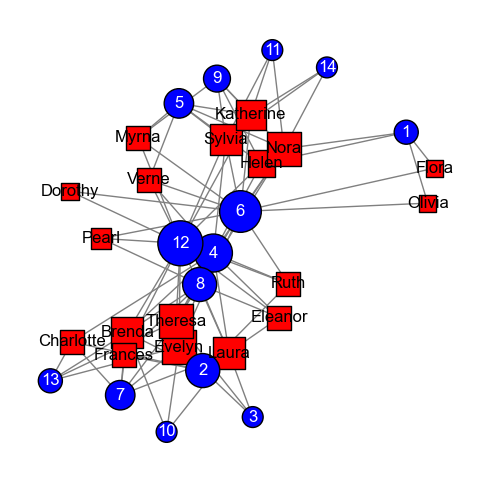

In [116]:
plt.figure(figsize=[6, 6])
for i in range(2):
    nx.draw_networkx_nodes(
        G = G_davis, 
        pos = pos_davis, 
        nodelist = nodes_davis[i], 
        node_size = [75*size for size in sizes_davis[i]], 
        node_color = node_colors_davis[i], 
        node_shape = shapes[i], 
        alpha = 1., 
        linewidths = 1., 
        edgecolors = 'black'
    )
    nx.draw_networkx_labels(
        G = G_davis, 
        pos = pos_davis, 
        labels = labels_davis[i], 
        font_color = font_colors_davis[i]
    )
nx.draw_networkx_edges(
    G = G_davis, 
    pos = pos_davis, 
    edge_color = 'gray'
)
plt.box(False)

#### Network projections

Matrix multiplication is the mathematical operation behind the projection of a bipartite matrix. Section 2.2.3 of [Session 2: Data handling and visualization]() has introduced the SciPy library to do matrix multiplication. Here, we use NetworkX's [`weighted_projected_graph()`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.bipartite.projection.weighted_projected_graph.html) function. In terms of graph theory, the projection of a bipartite graph $B$ to mode 0 is the matrix $B_0=B\cdot B^\mathrm{T}$ and to mode 1 $B_1=B^\mathrm{T}\cdot B$ where $B^\mathrm{T}$ is the transpse of $B$. The transpose of a matrix is the matrix with flipped rows and columns. To project `G_davis` to the women mode:

In [117]:
G_davis_women = nx.bipartite.weighted_projected_graph(
    B = G_davis, 
    nodes = nodes_davis[0]
)

The cells in the projected network of women give the number of events they have co-participated in. The result is the matrix in figure 2b by Breiger (1974):

In [118]:
nx.to_pandas_adjacency(G_davis_women).astype('int')

,Eleanor,Brenda,Dorothy,Verne,Flora,Olivia,Laura,Evelyn,Pearl,Ruth,Sylvia,Katherine,Myrna,Theresa,Charlotte,Frances,Helen,Nora
Eleanor,0,4,1,2,0,0,4,3,2,3,2,1,1,4,2,3,2,2
Brenda,4,0,1,2,0,0,6,6,2,3,2,1,1,6,4,4,2,2
Dorothy,1,1,0,2,1,1,1,2,2,2,2,2,2,2,0,1,1,1
Verne,2,2,2,0,1,1,2,2,2,3,4,3,3,3,1,1,3,3
Flora,0,0,1,1,0,2,0,1,1,1,1,1,1,1,0,0,1,2
Olivia,0,0,1,1,2,0,0,1,1,1,1,1,1,1,0,0,1,2
Laura,4,6,1,2,0,0,0,6,2,3,2,1,1,6,3,4,2,2
Evelyn,3,6,2,2,1,1,6,0,3,3,2,2,2,7,3,4,1,2
Pearl,2,2,2,2,1,1,2,3,0,2,2,2,2,3,0,2,1,2
Ruth,3,3,2,3,1,1,3,3,2,0,3,2,2,4,2,2,2,2


In [119]:
G_davis_events = nx.bipartite.weighted_projected_graph(
    B = G_davis, 
    nodes = nodes_davis[1], 
    ratio = False
)

The cells in the projected network of events give the number of women that have co-participated in them. The result is the matrix in figure 2c by Breiger (1974):

In [120]:
nx.to_pandas_adjacency(G_davis_events).astype('int')

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1,0,0,0,2,2,3,0,1,2,0,1,1,0,1
2,0,0,3,6,0,3,6,6,0,3,0,7,4,0
3,0,3,0,2,0,2,3,3,0,2,0,3,2,0
4,2,6,2,0,4,5,4,5,3,2,2,8,3,2
5,2,0,0,4,0,5,0,1,5,0,3,5,0,3
6,3,3,2,5,5,0,2,4,4,1,3,9,2,3
7,0,6,3,4,0,2,0,5,0,3,0,5,4,0
8,1,6,3,5,1,4,5,0,1,3,1,7,3,1
9,2,0,0,3,5,4,0,1,0,0,3,4,0,3
10,0,3,2,2,0,1,3,3,0,0,0,3,2,0


To draw the two projections, we use the [`interact()`](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html) function of the [ipywidgets](https://ipywidgets.readthedocs.io/) library. Our `filter_edges()` function allows you to interactively filter edges by their weight:

In [121]:
import ipywidgets

In [122]:
def filter_edges(G, pos, node_size, node_color, node_shape, font_color, slider_value, slider_min, slider_max, slider_step, weight='weight'):
    '''
    Draws a network with a slider that allows to filter edges by their weight.
    
    Parameters:
        G : NetworkX Graph, DiGraph, MultiGraph, or MultiDiGraph object
            Network that is to be filtered.
        pos : NumPy array
            Node positions.
        node_size : List
            Node sizes.
        node_color : String or (rgba) tuple of floats from 0-1
            Node color.
        node_shape : String
            Node shape.
        font_color : String or (rgba) tuple of floats from 0-1
            Font color.
        slider_value : integer or float
            Initial filter value.
        slider_min : integer or float
            Minimum filter value.
        slider_max : integer or float
            Maximum filter value.
        slider_step : integer or float
            Size of steps with which filter value is slided.
        weight : String, default 'weight'
            Name of edge attribute.
    '''
    def draw_filtered_graph(weight_min):
        G_filter = nx.Graph()
        G_filter.add_nodes_from(nodes_for_adding=G.nodes)
        G_filter.add_edges_from(ebunch_to_add=[(u, v, edge_attr) for u, v, edge_attr in G.edges(data=True) if edge_attr[weight] >= weight_min])
        plt.figure(figsize=[6, 6])
        nx.draw_networkx_nodes(
            G = G_filter, 
            pos = pos, 
            node_size = node_size, 
            node_color = node_color, 
            node_shape = node_shape, 
            linewidths = 1., 
            edgecolors = 'black'
        )
        nx.draw_networkx_labels(
            G = G_filter, 
            pos = pos, 
            font_color = font_color
        )
        nx.draw_networkx_edges(
            G = G_filter, 
            pos = pos, 
            width = list(nx.get_edge_attributes(G_filter, weight).values()), 
            edge_color = 'gray'
        )
        plt.box(False)
    ipywidgets.interact(
        draw_filtered_graph, 
        weight_min = ipywidgets.IntSlider(value=slider_value, min=slider_min, max=slider_max, step=slider_step)
    )

In [123]:
filter_edges(
    G = G_davis_women, 
    pos = pos_davis, 
    node_size = [75*size for size in sizes_davis[0]], 
    node_color = node_colors_davis[0], 
    node_shape = shapes[0], 
    font_color = font_colors_davis[0], 
    slider_value = 1, 
    slider_min = 1, 
    slider_max = 7, 
    slider_step = 1
)

interactive(children=(IntSlider(value=1, description='weight_min', max=7, min=1), Output()), _dom_classes=('wi…

Removing all event edges weaker than 4 (`weight_min = 4`) uncovers the two social groups of women discussed in the literature (Breiger 1974). These groups consist of women that participated in many events (the nodes are large) and in the same events many times. Women in the same group can be assumed to know each other better than women in the other group.

In [124]:
filter_edges(
    G = G_davis_events, 
    pos = pos_davis, 
    node_size = [75*size for size in sizes_davis[1]], 
    node_color = node_colors_davis[1], 
    node_shape = shapes[1], 
    font_color = font_colors_davis[1], 
    slider_value = 1, 
    slider_min = 1, 
    slider_max = 7, 
    slider_step = 1
)

interactive(children=(IntSlider(value=1, description='weight_min', max=7, min=1), Output()), _dom_classes=('wi…

Increasingly removing edges in the event network uncovers that the large events 2, 4, 6, 8, and 12 were crucial in bringing the women of both groups together.

<div class='alert alert-block alert-warning'>
<b>Additional resources</b>

The [`weighted_projected_graph()`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.bipartite.projection.weighted_projected_graph.html) function to project a bipartite graph creates weighted edges for the projected graphs but does not take edge weights of the bipartite network into accont. If this is what you want to do, use the [`generic_weighted_projected_graph()`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.bipartite.projection.generic_weighted_projected_graph.html) function with the custom `my_weight` weight function described there. The other projection functions [`overlap_weighted_projected_graph()`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.bipartite.projection.overlap_weighted_projected_graph.html) and [`collaboration_weighted_projected_graph()`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.bipartite.projection.collaboration_weighted_projected_graph.html) use the Jaccard index and a co-occurrence-based normalization, respectively, as weight functions.
</div>

In [Session 7: Network analysis](), we will revisit the bipartite sparse matrix projection introduced in [Session 2: Data handling and visualization]() and filter the projected graph to learn about global network connectivity.

## 5.6. Transforming, exporting, and importing networks

So far we have gone to great lengths to store information in graphs, but sometimes you may want to not have certain information in your graph (*e.g.*, to perform certain analyses). A viable way is to not put it into the graph in the first place. For example, if you do not want to have layer information in a graph, construct it from a Pandas edgelist without using a layer column. But sometimes building the graph from a nodelist and an edgelist may be too much work or those lists may simply not be available. In that case, you must work with the graph you have and transform it. To **remove an edge attribute** (or similarly: node attribute), you must loop through all edges and delete it:

In [125]:
_ = G_cns_mobile_week1_lcc.copy()
for u, v, data in _.edges(data=True):
    del data['weight']

If you want to **transform a multigraph into a graph**, you can use the MultiGraph as `incoming_graph_data` of a Graph:

In [126]:
MG = nx.MultiGraph()
nx.Graph(incoming_graph_data=MG)

Similarly, you can transform a MultiDiGraph into a DiGraph or Graph. The problem with these transformations is that the NetworkX algorithm, when removing the layer information, choses an arbitrary layer to keep. This is fine if you only want to know whether or not an edge connects a node pair in any of the existing layers. But if you have a weighted graph and weights are important, then the simple transformation does not help you. For example, you may want to average the edge weights from the various layers, sum them, or take the maximum value. This is what the following `weighted_multigraph_to_graph()` function does:

In [127]:
def weighted_multigraph_to_graph(G, directed, fun, weight='weight'):
    '''
    Transforms a weighted undirected or directed multigraph into a network without layers.
    
    Parameters:
        G : MultiGraph or MultiDiGraph
            Multilayer network to be transformde.
        directed : Boolean
            Whether the multigraph is directed or not.
        fun : String
            Function how edge weights from various layers are treated mathematically. Valid functions are 'mean', 'sum', and 'max'.
        weight : String, default 'weight'
            Name of edge attribute.
    
    Returns:
        A weighted Graph or DiGraph.
    
    '''
    G = G.copy()
    
    if fun == 'mean':
        edgelist = nx.to_pandas_edgelist(G=G).groupby(['source', 'target']).mean().reset_index()
    elif fun == 'sum':
        edgelist = nx.to_pandas_edgelist(G=G).groupby(['source', 'target']).sum().reset_index()
    elif fun == 'max':
        edgelist = nx.to_pandas_edgelist(G=G).groupby(['source', 'target']).max().reset_index()
    else:
        raise NotImplementedError("Valid functions are 'mean', 'sum', and 'max'.")
    
    for u, v, data in G.edges(data=True):
        del data[weight]
    
    if directed:
        G = nx.DiGraph(G)
    else:
        G = nx.Graph(G)
    
    nx.set_edge_attributes(G=G, values=get_attr_values(df=edgelist, type_of_list='edges', attr=[weight]))
    
    return G

The unlayered undirected network of face-to-face interactions where edge weights are averaged is:

In [128]:
G_cns_bt_f2f_p_lcc_unlayered = weighted_multigraph_to_graph(G=G_cns_bt_f2f_p_lcc, directed=False, fun='mean', weight='strength')

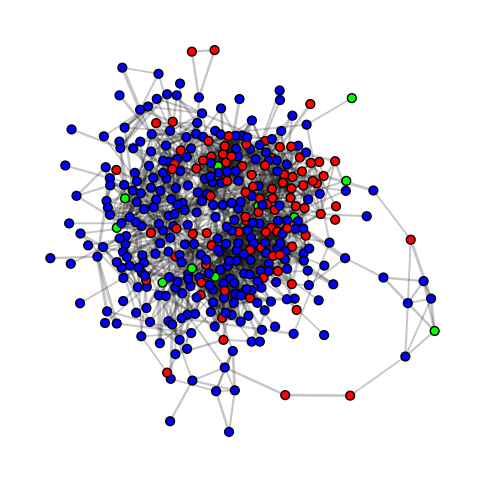

In [129]:
plt.figure(figsize=[6, 6])
nx.draw_networkx_nodes(
    G = G_cns_bt_f2f_p_lcc_unlayered, 
    pos = nx.get_node_attributes(G=G_cns_bt_f2f_p_lcc_unlayered, name='pos'), 
    node_size = 40, 
    node_color = list(nx.get_node_attributes(G=G_cns_bt_f2f_p_lcc_unlayered, name='sex').values()), 
    cmap = plt.cm.brg, 
    linewidths = 1., 
    edgecolors = 'black'
)
nx.draw_networkx_edges(
    G = G_cns_bt_f2f_p_lcc_unlayered, 
    pos = nx.get_node_attributes(G=G_cns_bt_f2f_p_lcc_unlayered, name='pos'), 
    width = [width/20 for width in list(nx.get_edge_attributes(G=G_cns_bt_f2f_p_lcc_unlayered, name='strength').values())], 
    alpha = .25, 
    edge_cmap = plt.cm.rainbow, 
    node_size = 40
)
plt.box(False)
plt.savefig('results/G_cns_bt_f2f_p_lcc_unlayered.pdf')
plt.savefig('results/G_cns_bt_f2f_p_lcc_unlayered.png')

The unlayered directed network of text messages and phone calls where edge weights are averaged is:

In [130]:
G_cns_mobile_week1_lcc_unlayered = weighted_multigraph_to_graph(G=G_cns_mobile_week1_lcc, directed=True, fun='mean')

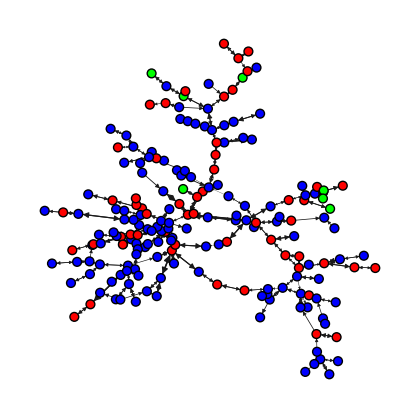

In [131]:
plt.figure(figsize=[4, 4])
nx.draw(
    G = G_cns_mobile_week1_lcc_unlayered, 
    pos = nx.get_node_attributes(G=G_cns_mobile_week1_lcc_unlayered, name='pos'), 
    node_size = 40, 
    node_color = list(nx.get_node_attributes(G=G_cns_mobile_week1_lcc_unlayered, name='sex').values()), 
    cmap = plt.cm.brg, 
    linewidths = 1., 
    edgecolors = 'black', 
    width = [width/5 for width in list(nx.get_edge_attributes(G=G_cns_mobile_week1_lcc_unlayered, name='weight').values())], 
    arrowsize = [2*width for width in list(nx.get_edge_attributes(G=G_cns_mobile_week1_lcc_unlayered, name='weight').values())], 
    #edge_color = 'gray'
)
plt.savefig('results/G_cns_mobile_week1_lcc_unlayered.pdf')
plt.savefig('results/G_cns_mobile_week1_lcc_unlayered.png')

Another desirable operation is to **transform a directed graph into a graph**. Again you can make a simple transformation, but again edge weights will not be treated in a meaningful way:

In [132]:
DG = nx.DiGraph()
DG.to_undirected()

The `weighted_digraph_to_graph()` function can handle edge weights and gives you the option to use a 'mean', 'sum', or 'max' function to combine the (u, v) and (v, u) edge weights if both directions exist. This works for layered and unlayered networks. In addition, if you set `reciprocal = True` then only edges will be kept for which both directions exist:

In [133]:
def weighted_digraph_to_graph(G, layered, fun, reciprocal, weight='weight'):
    '''
    Transforms a weighted directed graph into a weighted undirected network.
    
    Parameters:
        G : DiGraph or MultiDiGraph
            Directed network to be transformed.
        layered : Boolean
            Whether or not G is a MultiDiGraph.
        fun : String
            Function how edge weights from two edge directions are treated mathematically. Valid functions are 'mean', 'sum', and 'max'.
        reciprocal : Boolean
            If True only keep edges that appear in both directions in the original DiGraph.
        weight : String, default 'weight'
            Name of edge attribute.
    
    Returns:
        A weighted Graph.
    '''
    G = G.copy()
    
    for u, v, data in G.edges(data=True):
        data['diweight'] = data.pop(weight)
    
    if layered:
        for node in G:
            for neighbor in nx.neighbors(G, node):
                for key in G[node][neighbor].keys():
                    if node in nx.neighbors(G, neighbor):
                        if key in G[neighbor][node].keys():
                            if fun == 'mean':
                                G.edges[node, neighbor, key][weight] = (G.edges[node, neighbor, key]['diweight'] + G.edges[neighbor, node, key]['diweight']) / 2
                            elif fun == 'sum':
                                G.edges[node, neighbor, key][weight] = (G.edges[node, neighbor, key]['diweight'] + G.edges[neighbor, node, key]['diweight'])
                            elif fun == 'max':
                                G.edges[node, neighbor, key][weight] = max(G.edges[node, neighbor, key]['diweight'], G.edges[neighbor, node, key]['diweight'])
                            else:
                                raise NotImplementedError("Valid functions are 'mean', 'sum', and 'max'.")
                    else:
                        G.edges[node, neighbor, key][weight] = G.edges[node, neighbor, key]['diweight']
    else:
        for node in G:
            for neighbor in nx.neighbors(G, node):
                if node in nx.neighbors(G, neighbor):
                    if fun == 'mean':
                        G.edges[node, neighbor][weight] = (G.edges[node, neighbor]['diweight'] + G.edges[neighbor, node]['diweight']) / 2
                    elif fun == 'sum':
                        G.edges[node, neighbor][weight] = (G.edges[node, neighbor]['diweight'] + G.edges[neighbor, node]['diweight'])
                    elif fun == 'max':
                        G.edges[node, neighbor][weight] = max(G.edges[node, neighbor]['diweight'], G.edges[neighbor, node]['diweight'])
                    else:
                        raise NotImplementedError("Valid functions are 'mean', 'sum', and 'max'.")
                else:
                    G.edges[node, neighbor][weight] = G.edges[node, neighbor]['diweight']
    
    for u, v, data in G.edges(data=True):
        del data['diweight']
    
    G = G.to_undirected(reciprocal=reciprocal)
    
    return G

The layered undirected network of text messages and phone calls where edge weights are averaged is:

In [134]:
G_cns_mobile_week1_lcc_undirected = weighted_digraph_to_graph(G=G_cns_mobile_week1_lcc, layered=True, fun='mean', reciprocal=False)

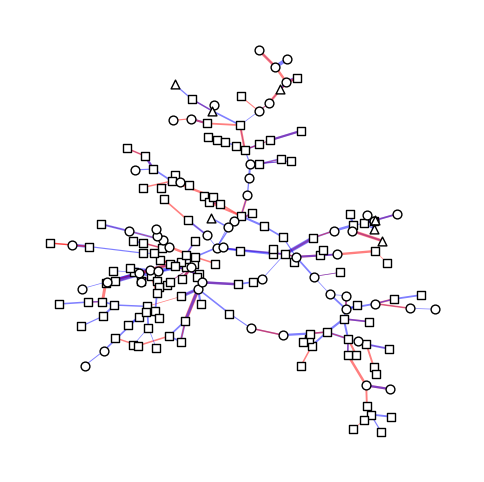

In [135]:
plt.figure(figsize=[6, 6])
for i in range(3):
    nx.draw_networkx_nodes(
        G = G_cns_mobile_week1_lcc_undirected, 
        pos = nx.get_node_attributes(G=G_cns_mobile_week1_lcc_undirected, name='pos'), 
        nodelist = [node for node, attribute in G_cns_mobile_week1_lcc_undirected.nodes(data=True) if attribute['sex'] == i], 
        node_size = 40, 
        node_color = 'white', 
        node_shape = shapes[i], 
        linewidths = 1., 
        edgecolors = 'black'
    )
nx.draw_networkx_edges(
    G = G_cns_mobile_week1_lcc_undirected, 
    pos = nx.get_node_attributes(G=G_cns_mobile_week1_lcc_undirected, name='pos'), 
    width = [width/2 for width in list(nx.get_edge_attributes(G=G_cns_mobile_week1_lcc_undirected, name='weight').values())], 
    edge_color = [key for u, v, key in G_cns_mobile_week1_lcc_undirected.edges.keys()], 
    alpha = .5, 
    edge_cmap = plt.cm.bwr, 
    node_size = 40
)
plt.box(False)
plt.savefig('results/G_cns_mobile_week1_lcc_undirected.pdf')
plt.savefig('results/G_cns_mobile_week1_lcc_undirected.png')

The unlayered undirected network of text messages and phone calls where edge weights are averaged is:

In [136]:
G_cns_mobile_week1_lcc_unlayered_undirected = weighted_digraph_to_graph(G=G_cns_mobile_week1_lcc_unlayered, layered=False, fun='mean', reciprocal=False)

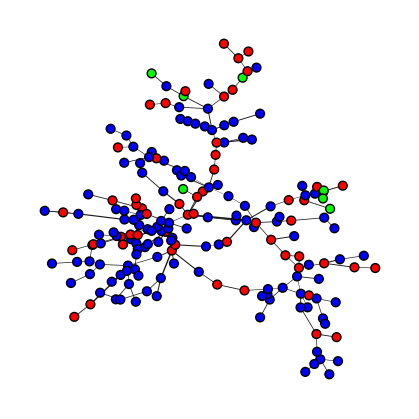

In [137]:
plt.figure(figsize=[4, 4])
nx.draw(
    G = G_cns_mobile_week1_lcc_unlayered_undirected, 
    pos = nx.get_node_attributes(G=G_cns_mobile_week1_lcc_unlayered_undirected, name='pos'), 
    node_size = 40, 
    node_color = list(nx.get_node_attributes(G=G_cns_mobile_week1_lcc_unlayered_undirected, name='sex').values()), 
    cmap = plt.cm.brg, 
    linewidths = 1., 
    edgecolors = 'black', 
    width = [width/5 for width in list(nx.get_edge_attributes(G=G_cns_mobile_week1_lcc_unlayered_undirected, name='weight').values())], 
    #edge_color = 'gray'
)
plt.savefig('results/G_cns_mobile_week1_lcc_unlayered_undirected.pdf')
plt.savefig('results/G_cns_mobile_week1_lcc_unlayered_undirected.png')

Though the network figures we have created are appealing to the eye (don't they?), NetworkX is not the optimal library to draw networks. The biggest problem may be that parallel edges in directed and layered networks are placed on top of each other, hiding each other. There is also no parameter with which to control the order in which nodes or edges are drawn. Both problems can be solved, but this is quite laborious. For drawing reasons, to analyze networks in another software, or simply to use them in another notebook, it is necessary to **export and import networks**. NetworkX proposes to export networks in the widely used [GML](https://networkx.org/documentation/stable/reference/readwrite/gml.html) format. Just make sure that your graph does not have attribute names noted [here](https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.gml.write_gml.html) since those will be ignored. If you want to export your network to the popular [Gephi](https://gephi.org/) platform you should export it in the [GEXF](https://networkx.org/documentation/stable/reference/readwrite/gexf.html) format. [Other formats](https://networkx.org/documentation/stable/reference/readwrite/index.html) are also supported, but here we only discuss GML and GEXF. Both export functions do not permit attributes to be array-like objects like the node position from a layout algorithm. Such attributes must be removed before exporting. The `export_graph()` function lets you write your network to a file and remove a node attribute in one step:

In [138]:
def export_graph(G, path, format_, node_attr_to_del=None):
    '''
    Writes a graph object to file.
    
    Parameters:
        G : Graph, DiGraph, MultiGraph, or MultiDiGraph
            Network to export.
        path : String
            folder and filename without file ending.
        format_ : String
            Format to export to. Valid formats are 'gml' and 'gexf'.
        node_attr_to_del : String, default None
            Name of a node attribute to be removed before exporting. Intended use is to remove a potential 'pos' attribute from layouting.
    '''
    _ = G_cns_mobile_week1_lcc.copy()
    if node_attr_to_del:
        for (n, d) in _.nodes(data=True):
            del d[node_attr_to_del]
    if format_ == 'gml':
        nx.write_gml(G=_, path=path+'.gml')
    elif format_ == 'gexf':
        nx.write_gexf(G=_, path=path+'.gexf')
    else:
        raise NotImplementedError("Valid formats are 'gml' and 'gexf'.")

In [139]:
export_graph(G=G_cns_mobile_week1_lcc, path='results/G_cns_mobile_week1_lcc', format_='gml', node_attr_to_del='pos')
export_graph(G=G_cns_mobile_week1_lcc, path='results/G_cns_mobile_week1_lcc', format_='gexf', node_attr_to_del='pos')

Read these files with the [`read_gml()`](https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.gml.read_gml.html) and [`read_gexf()`](https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.gexf.read_gexf.html) functions. Note that GEXF export/import adds additional but redundant attributes; GML does not:

In [140]:
[(u, data) for u, data in nx.read_gexf(path='results/G_cns_mobile_week1_lcc.gexf').nodes(data=True)][:5]

[('512', {'sex': 1, 'label': '512'}),
 ('0', {'sex': 0, 'label': '0'}),
 ('4', {'sex': 0, 'label': '4'}),
 ('6', {'sex': 1, 'label': '6'}),
 ('521', {'sex': 1, 'label': '521'})]

In [141]:
[(u, data) for u, data in nx.read_gml(path='results/G_cns_mobile_week1_lcc.gml').nodes(data=True)][:5]

[('512', {'sex': 1}),
 ('0', {'sex': 0}),
 ('4', {'sex': 0}),
 ('6', {'sex': 1}),
 ('521', {'sex': 1})]

Finally, it is unfortunate that we have to remove the node position attribute before exporting networks to GML or GEXF formats. The ultimate way to make a graph object portable is to save it as a [pickle](https://docs.python.org/3/library/pickle.html) file. This lets you save the object structure as intractable as it may be for other formats. In the following cells, use 'wb' (w for writing) in combination with `dump` to export and 'rb' (r for reading) in combination with `load` to import a network. We will now export a series of networks which we will use in [Session 7: Network analysis]():

In [142]:
import pickle

In [143]:
with open('results/G_cns_fb_lcc.pickle', 'wb') as f:
    pickle.dump(G_cns_fb_lcc.copy(), f, pickle.HIGHEST_PROTOCOL)
with open('results/G_cns_mobile_week1_lcc.pickle', 'wb') as f:
    pickle.dump(G_cns_mobile_week1_lcc.copy(), f, pickle.HIGHEST_PROTOCOL)
with open('results/G_cns_mobile_week1_lcc_unlayered.pickle', 'wb') as f:
    pickle.dump(G_cns_mobile_week1_lcc_unlayered.copy(), f, pickle.HIGHEST_PROTOCOL)
with open('results/G_cns_mobile_week1_lcc_undirected.pickle', 'wb') as f:
    pickle.dump(G_cns_mobile_week1_lcc_undirected.copy(), f, pickle.HIGHEST_PROTOCOL)
with open('results/G_cns_mobile_week1_lcc_unlayered_undirected.pickle', 'wb') as f:
    pickle.dump(G_cns_mobile_week1_lcc_unlayered_undirected.copy(), f, pickle.HIGHEST_PROTOCOL)
with open('results/G_cns_bt_f2f_p_lcc.pickle', 'wb') as f:
    pickle.dump(G_cns_bt_f2f_p_lcc.copy(), f, pickle.HIGHEST_PROTOCOL)
with open('results/G_cns_bt_f2f_p_lcc_unlayered.pickle', 'wb') as f:
    pickle.dump(G_cns_bt_f2f_p_lcc_unlayered.copy(), f, pickle.HIGHEST_PROTOCOL)

To read a pickle file:

In [144]:
with open('results/G_cns_fb_lcc.pickle', 'rb') as f:
    _ = pickle.load(f)
_

This concludes Session 5: Network construction and visualization. The networks we have constructed, enriched, and layouted here will be the basis for the network analyses to follow.

## Commented references

### Recommended textbooks and NetworkX resources

Ma, E. & Seth, M. (2022). *Network Analysis Made Simple*. LeanPub. https://leanpub.com/nams. *An easy, well-maintained, and self-explanatory resource for NetworkX self-education that hides the inner workings of algorithms in custom functions. Use the [website](https://ericmjl.github.io/Network-Analysis-Made-Simple/) as a guide to Jupyter Notebooks on constructing, importing, exporting, and analyzing networks. You can also launch a binder session to execute notebooks in the cloud.*

McLevey, J. (2022). *Doing Computational Social Science: A Practical Introduction*. SAGE. https://us.sagepub.com/en-us/nam/doing-computational-social-science/book266031. *A rather complete introduction to the field with well-structured and insightful chapters also on networks and network modeling. The [website](https://github.com/UWNETLAB/dcss_supplementary) offers the code used in the book.*

Menczer, F., Fortunato, S., & Davis, C. A. (2020). *A First Course in Network Science*. Cambridge University Press. https://doi.org/10.1017/9781108653947. *An introductory course with exercises that emerged from years of teaching network analysis using NetworkX. Written from the physicist's perspective, this book is focused on the network science paradigms of small-world networks, scale-free networks, community detection, and complex systems modeling. The [website](https://cambridgeuniversitypress.github.io/FirstCourseNetworkScience/) provides all code in the form of Jupyter Notebooks, data, and solutions to the exercises.*

Platt, E. L. (2019). *Network Science with Python and NetworkX Quick Start Guide*. Packt. https://www.packtpub.com/product/network-science-with-python-and-networkx-quick-start-guide/9781789955316. *Systematic introduction to the practice of network preprocessing and analysis. Have a look at chapters 1–4 and 10–11 for the focus of session 2 here. All Jupyter Notebooks are publically available on the [website](https://github.com/PacktPublishing/Network-Science-with-Python-and-NetworkX-Quick-Start-Guide).*

### Advanced textbooks

Artime, O., Benigni, B., Bertagnolli, G., d'Andrea, V., Gallotti, R., Ghavasieh, A., Raimondo, S., & De Domenico, M. (2022). *Multilayer Network Science*. Cambridge University Press. https://doi.org/10.1017/9781009085809. *Interdisciplinary state-of-the-art account of the topic, quite advanced and mathematical.*

Caldarelli, G. & Chessa, A. (2016). *Data Science and Complex Networks: Real Case Studies with Python*. Oxford University Press. https://doi.org/10.1093/acprof:oso/9780199639601.001.0001. *Interdisciplinary display of case studies from the physics/complexity perspective. Jupyter Notebooks that use NetworkX but add many custom functions are available on the [website](https://github.com/datascienceandcomplexnetworks).*

### Other cited references

Breiger, R. L. (1974). "The duality of persons and groups". *Social Forces* 53:181–190. https://doi.org/10.1093/sf/53.2.181. *A fundamental paper about the sociological use of bipartite network structures.*

Freeman, L. (2004). *The Development of Social Network Analysis: A Study in the Sociology of Science*. Empirical Press. *The history of the field of Social Network Analysis as told by one of its founders.*

Fuhse, J. (2021). *Social Networks of Meaning and Communication*. Oxford University Press. https://doi.org/10.1093/oso/9780190275433.001.0001. *Accessible account of sociological network theory that delves deep into the mutual constitution of social networks and communication networks.*

Krempel, L. (2014). "Network visualization". In: Scott, J. & Carrington, P. J. (Eds.), *The SAGE Handbook of Social Network Analysis* (pp. 558–577). Sage. https://doi.org/10.4135/9781446294413. *A systematic overview how to visualize rich network information.*

Lee, M. & Martin, J. L. (2018). "Doorway to the dharma of duality". *Poetics* 68:18–30. https://doi.org/10.1016/j.poetic.2018.01.001. *A methodological account of socio-cultural analysis using publication data.*

Lietz, H., Schmitz, A., & Schaible, J. (2021). "Social Network Analysis with Digital Behavioral Data". *easy_social_sciences* 66:41–48. https://doi.org/10.15464/easy.2021.005. *A short and easily accessible introduction to the topic.*

Mones, E., Stopczynski, A., & Lehmann, S. (2017). "Contact activity and dynamics of the social core". *EPJ Data Science* 6:6. https://doi.org/10.1140/epjds/s13688-017-0103-y.

Sapiezynski, P., Stopczynski, A., Lassen, D. D., & Lehmann, S. (2019). "Interaction data from the Copenhagen Networks Study". *Scientific Data* 6:315 (2019). https://doi.org/10.1038/s41597-019-0325-x. *Description of one of the richest publicly available multilayer network datasets.*

Sekara, V., Stopczynski, A., & Lehmann, S. (2016). "Fundamental structures of dynamic social networks". *Proceedings of the National Academy of Sciences* 113:9977–9982. https://doi.org/10.1073/pnas.1602803113. *Insightful multilayer analysis of the Copenhagen Networks Study interaction dataset.*

Soundarajan, S., Tamersoy, A., Khalil, E. B., Eliassi-Rad, T., Chau, D. H., Gallagher, B., & Roundy, K. (2016). "Generating graph snapshots from streaming edge data". In: *Proceedings of the 25th International Conference Companion on World Wide Web - WWW ’16 Companion* (pp. 109–110). ACM Press. https://doi.org/10.1145/2872518.2889398. *Flexible method for creating network snapshots.*

<div class='alert alert-block alert-success'>
<b>Document information</b>

Contact and main author: Haiko Lietz

Contributors: ...

Acknowledgements: ...

Version date: 17. February 2023

License: ...
</div>

#### Notes to be removed before publication

- add links to networkx site for NetworkX 2.8.4